In [72]:
%pip install --upgrade pip
%pip install pandas matplotlib seaborn numpy

# Importazione delle librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [95]:
# Impostazioni per migliorare la visualizzazione dei grafici
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette("Paired", as_cmap=False))
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [74]:
print("Lettura del file CSV di C++ Windows/Linux/MacOS")
# Lettura del file CSV
try:
    # Assumiamo che il file si trovi nella stessa directory del notebook
    bench_df = pd.read_csv('bench.csv')
    print(f"File CSV caricato con successo. Forma: {bench_df.shape}")
    print("Colonne disponibili:", bench_df.columns.tolist())
except Exception as e:
    print(f"Errore durante il caricamento del file: {e}")

Lettura del file CSV di C++ Windows/Linux/MacOS
File CSV caricato con successo. Forma: (54, 17)
Colonne disponibili: ['os', 'blas', 'numThreads', 'timestamp', 'matrixName', 'rows', 'cols', 'nonZeros', 'loadTime', 'loadMem', 'decompTime', 'decompMem', 'decompPeakMem', 'solveTime', 'solveMem', 'solvePeakMem', 'error']


In [75]:
    
print("Lettura del file CSV di MATLAB Windows")
# Lettura del file CSV
try:
    # Assumiamo che il file si trovi nella stessa directory del notebook
    matlab_win_df = pd.read_csv('matlab/bench_win64.csv')
    print(f"File CSV caricato con successo. Forma: {matlab_win_df.shape}")
    print("Colonne disponibili:", matlab_win_df.columns.tolist())
except Exception as e:
    print(f"Errore durante il caricamento del file: {e}")

Lettura del file CSV di MATLAB Windows
File CSV caricato con successo. Forma: (9, 15)
Colonne disponibili: ['os', 'timestamp', 'exception', 'matrixName', 'matrixSize', 'rows', 'cols', 'nonZeros', 'loadTime', 'loadMem', 'decompTime', 'decompMem', 'solveTime', 'solveMem', 'relativeError']


In [76]:
print("Lettura del file CSV di MATLAB Linux")
# Lettura del file CSV
try:
    # Assumiamo che il file si trovi nella stessa directory del notebook
    matlab_linux_df = pd.read_csv('matlab/bench_glnxa64.csv')
    print(f"File CSV caricato con successo. Forma: {matlab_linux_df.shape}")
    print("Colonne disponibili:", matlab_linux_df.columns.tolist())
except Exception as e:
    print(f"Errore durante il caricamento del file: {e}")

Lettura del file CSV di MATLAB Linux
File CSV caricato con successo. Forma: (7, 15)
Colonne disponibili: ['os', 'timestamp', 'exception', 'matrixName', 'matrixSize', 'rows', 'cols', 'nonZeros', 'loadTime', 'loadMem', 'decompTime', 'decompMem', 'solveTime', 'solveMem', 'relativeError']


In [77]:
# Visualizzazione delle statistiche riassuntive
print("\nStatistiche riassuntive per combinazione OS e BLAS:")
display(bench_df.groupby(['os', 'blas'])[['loadTime', 'decompTime', 'solveTime', 'error']].mean())


Statistiche riassuntive per combinazione OS e BLAS:


loadTime    decompTime     solveTime         error
os      blas                                                             
Linux   MKL         1852.000000  26465.888889  62755.000000  7.706453e-08
        OpenBLAS    2040.222222  33657.888889  71482.888889  6.463158e-08
Windows MKL         1627.777778  20706.555556  10310.777778  7.706453e-08
        OpenBLAS    1726.444444  20001.444444   6463.666667  6.463172e-08
macOS   Accelerate  1333.555556  11048.555556   9139.888889  6.336724e-08
        OpenBLAS    1298.222222  14772.111111   6851.555556  6.915083e-08

Creazione heatmap per confronto dei tempi di decomposizione...


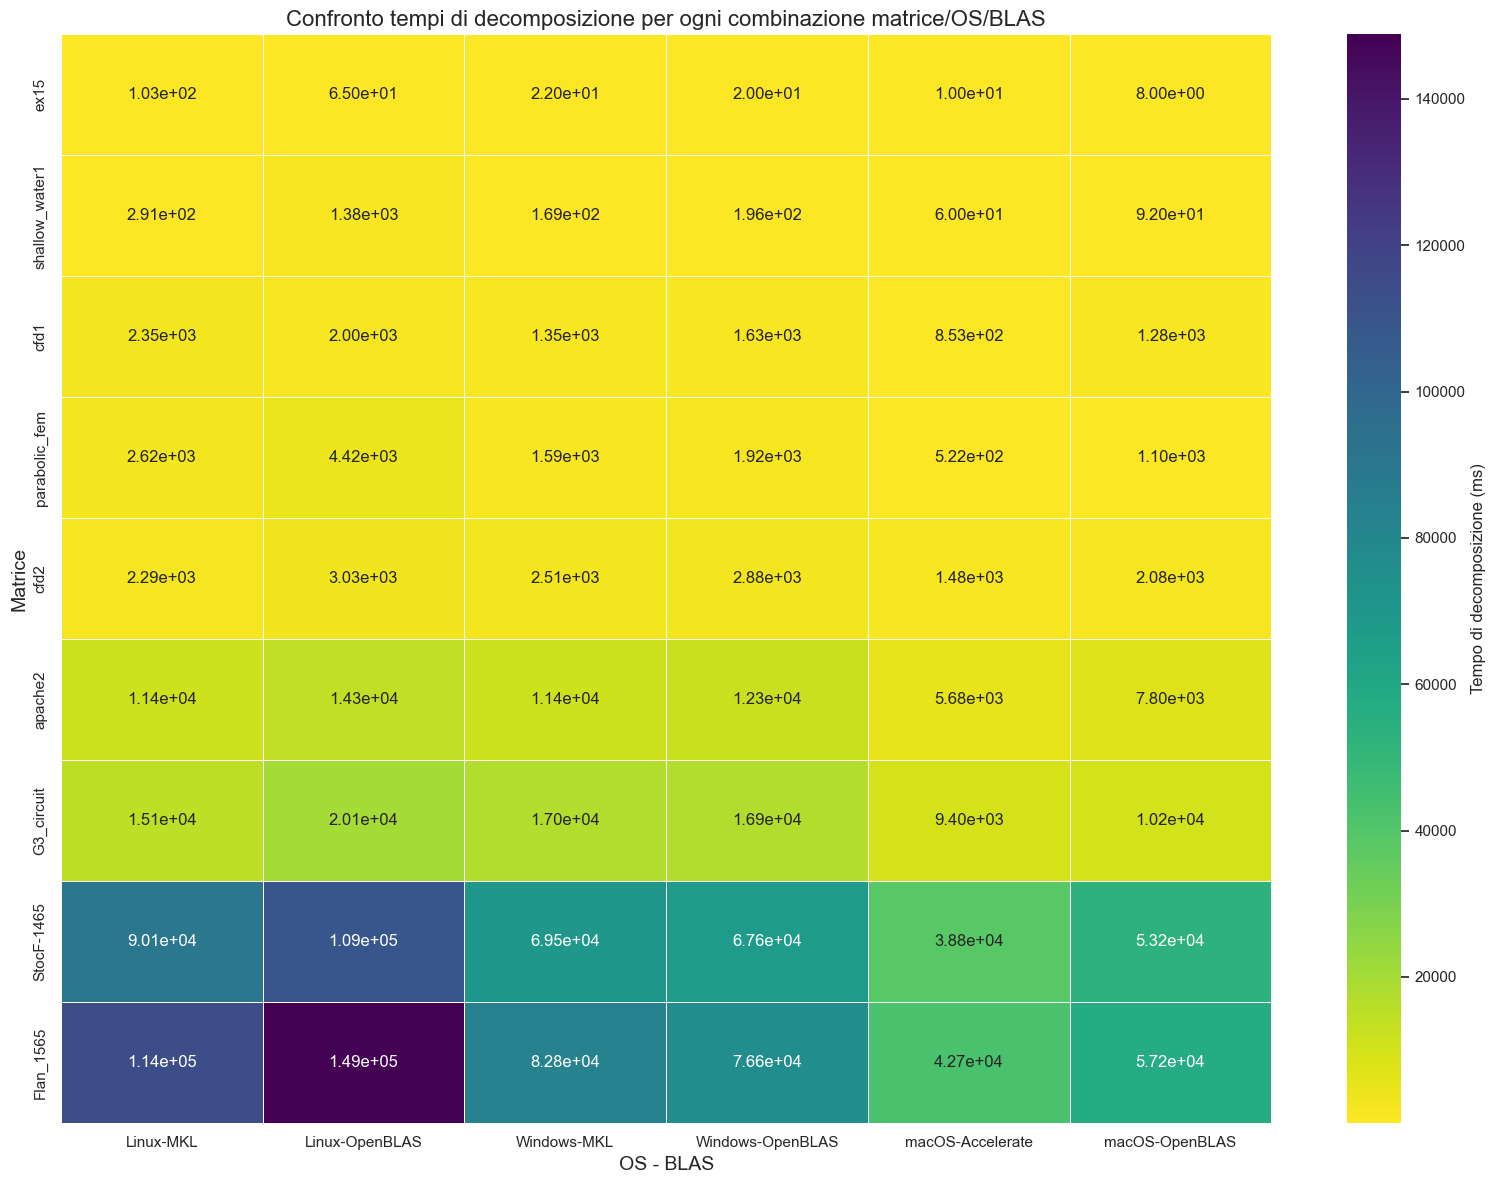

Creazione grafico a barre ordinato per i tempi di decomposizione...


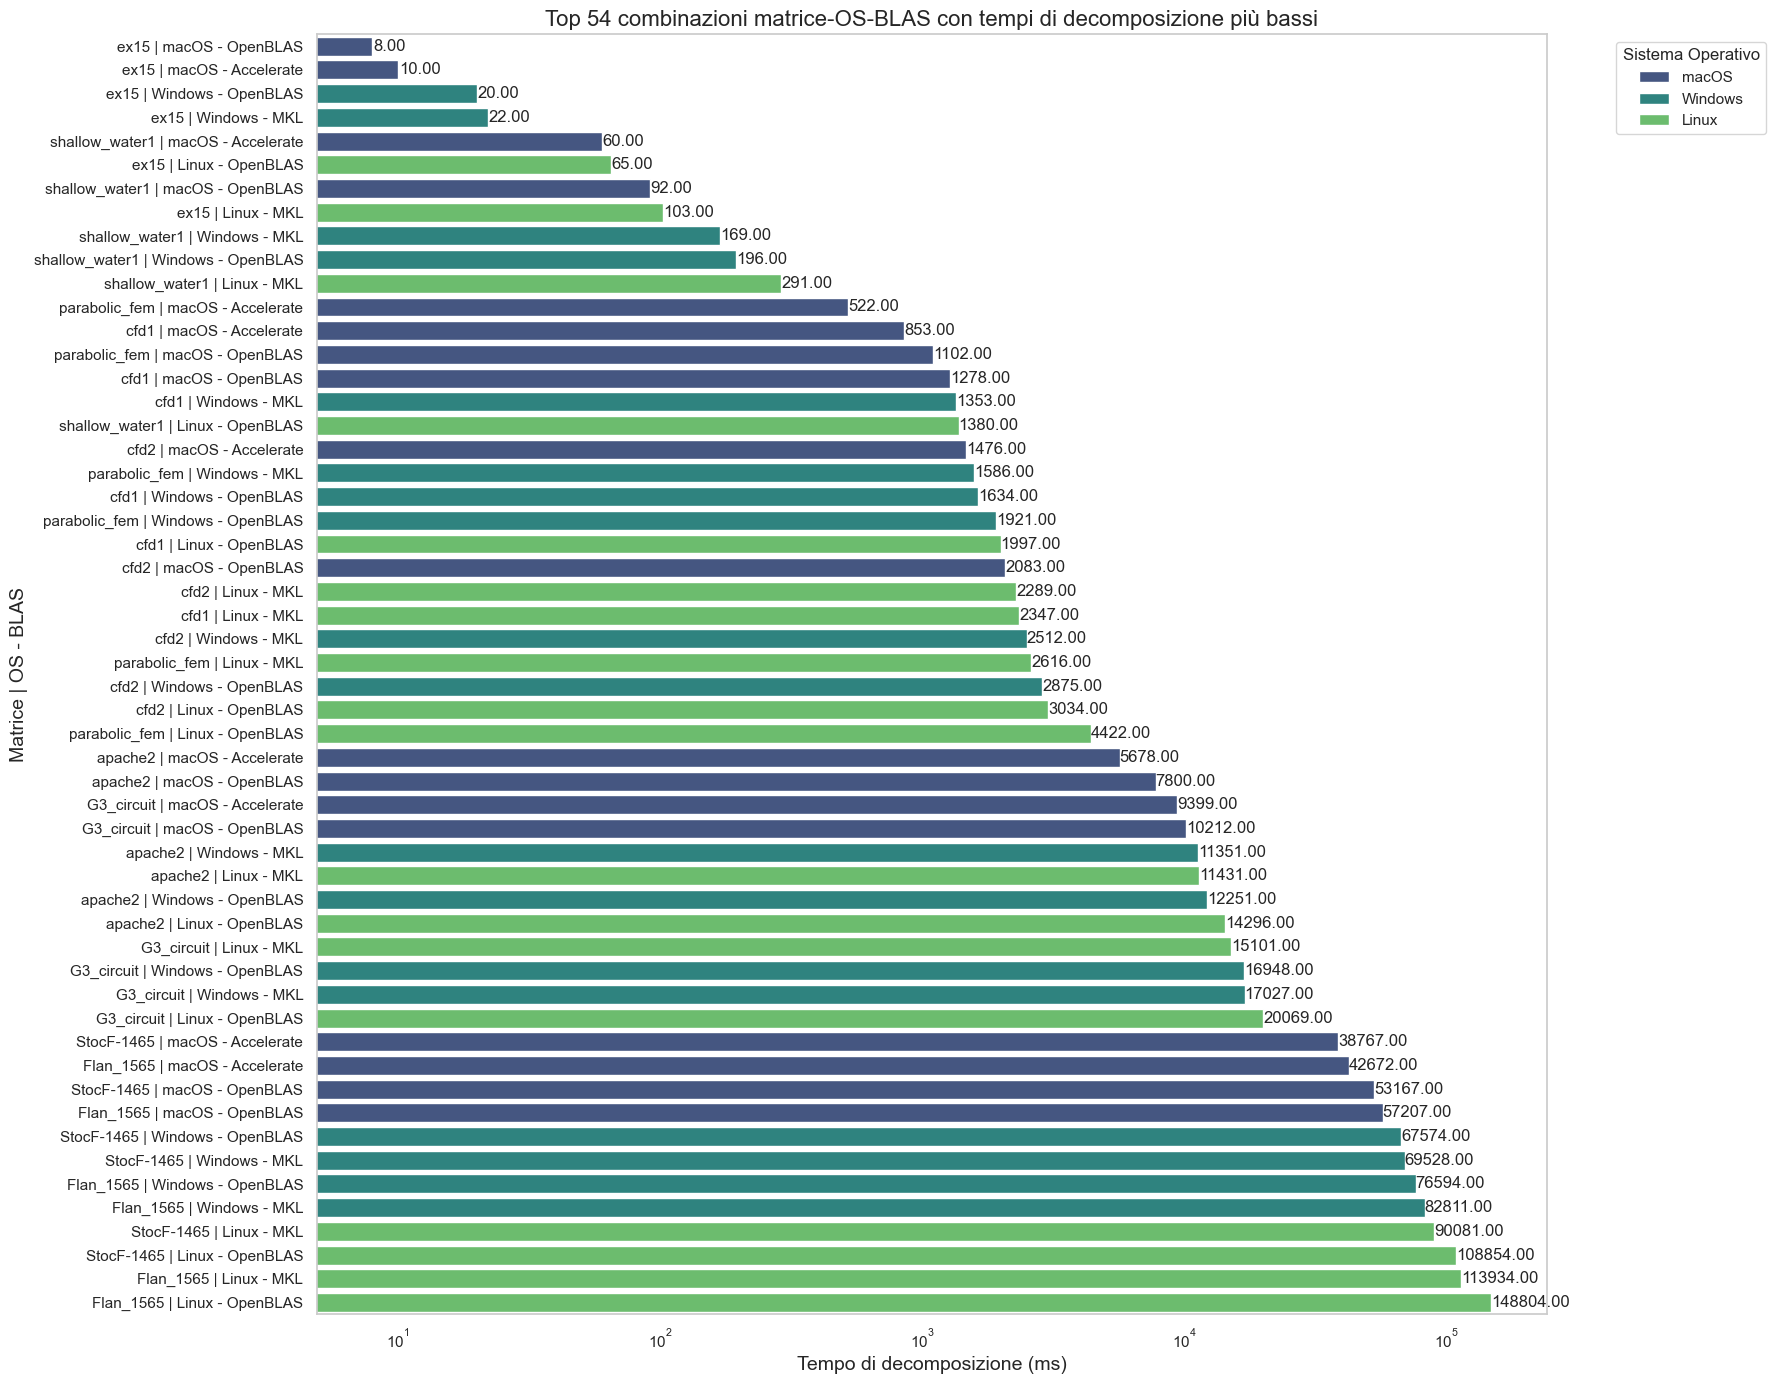

Creazione facet grid per confronto dei tempi di decomposizione...


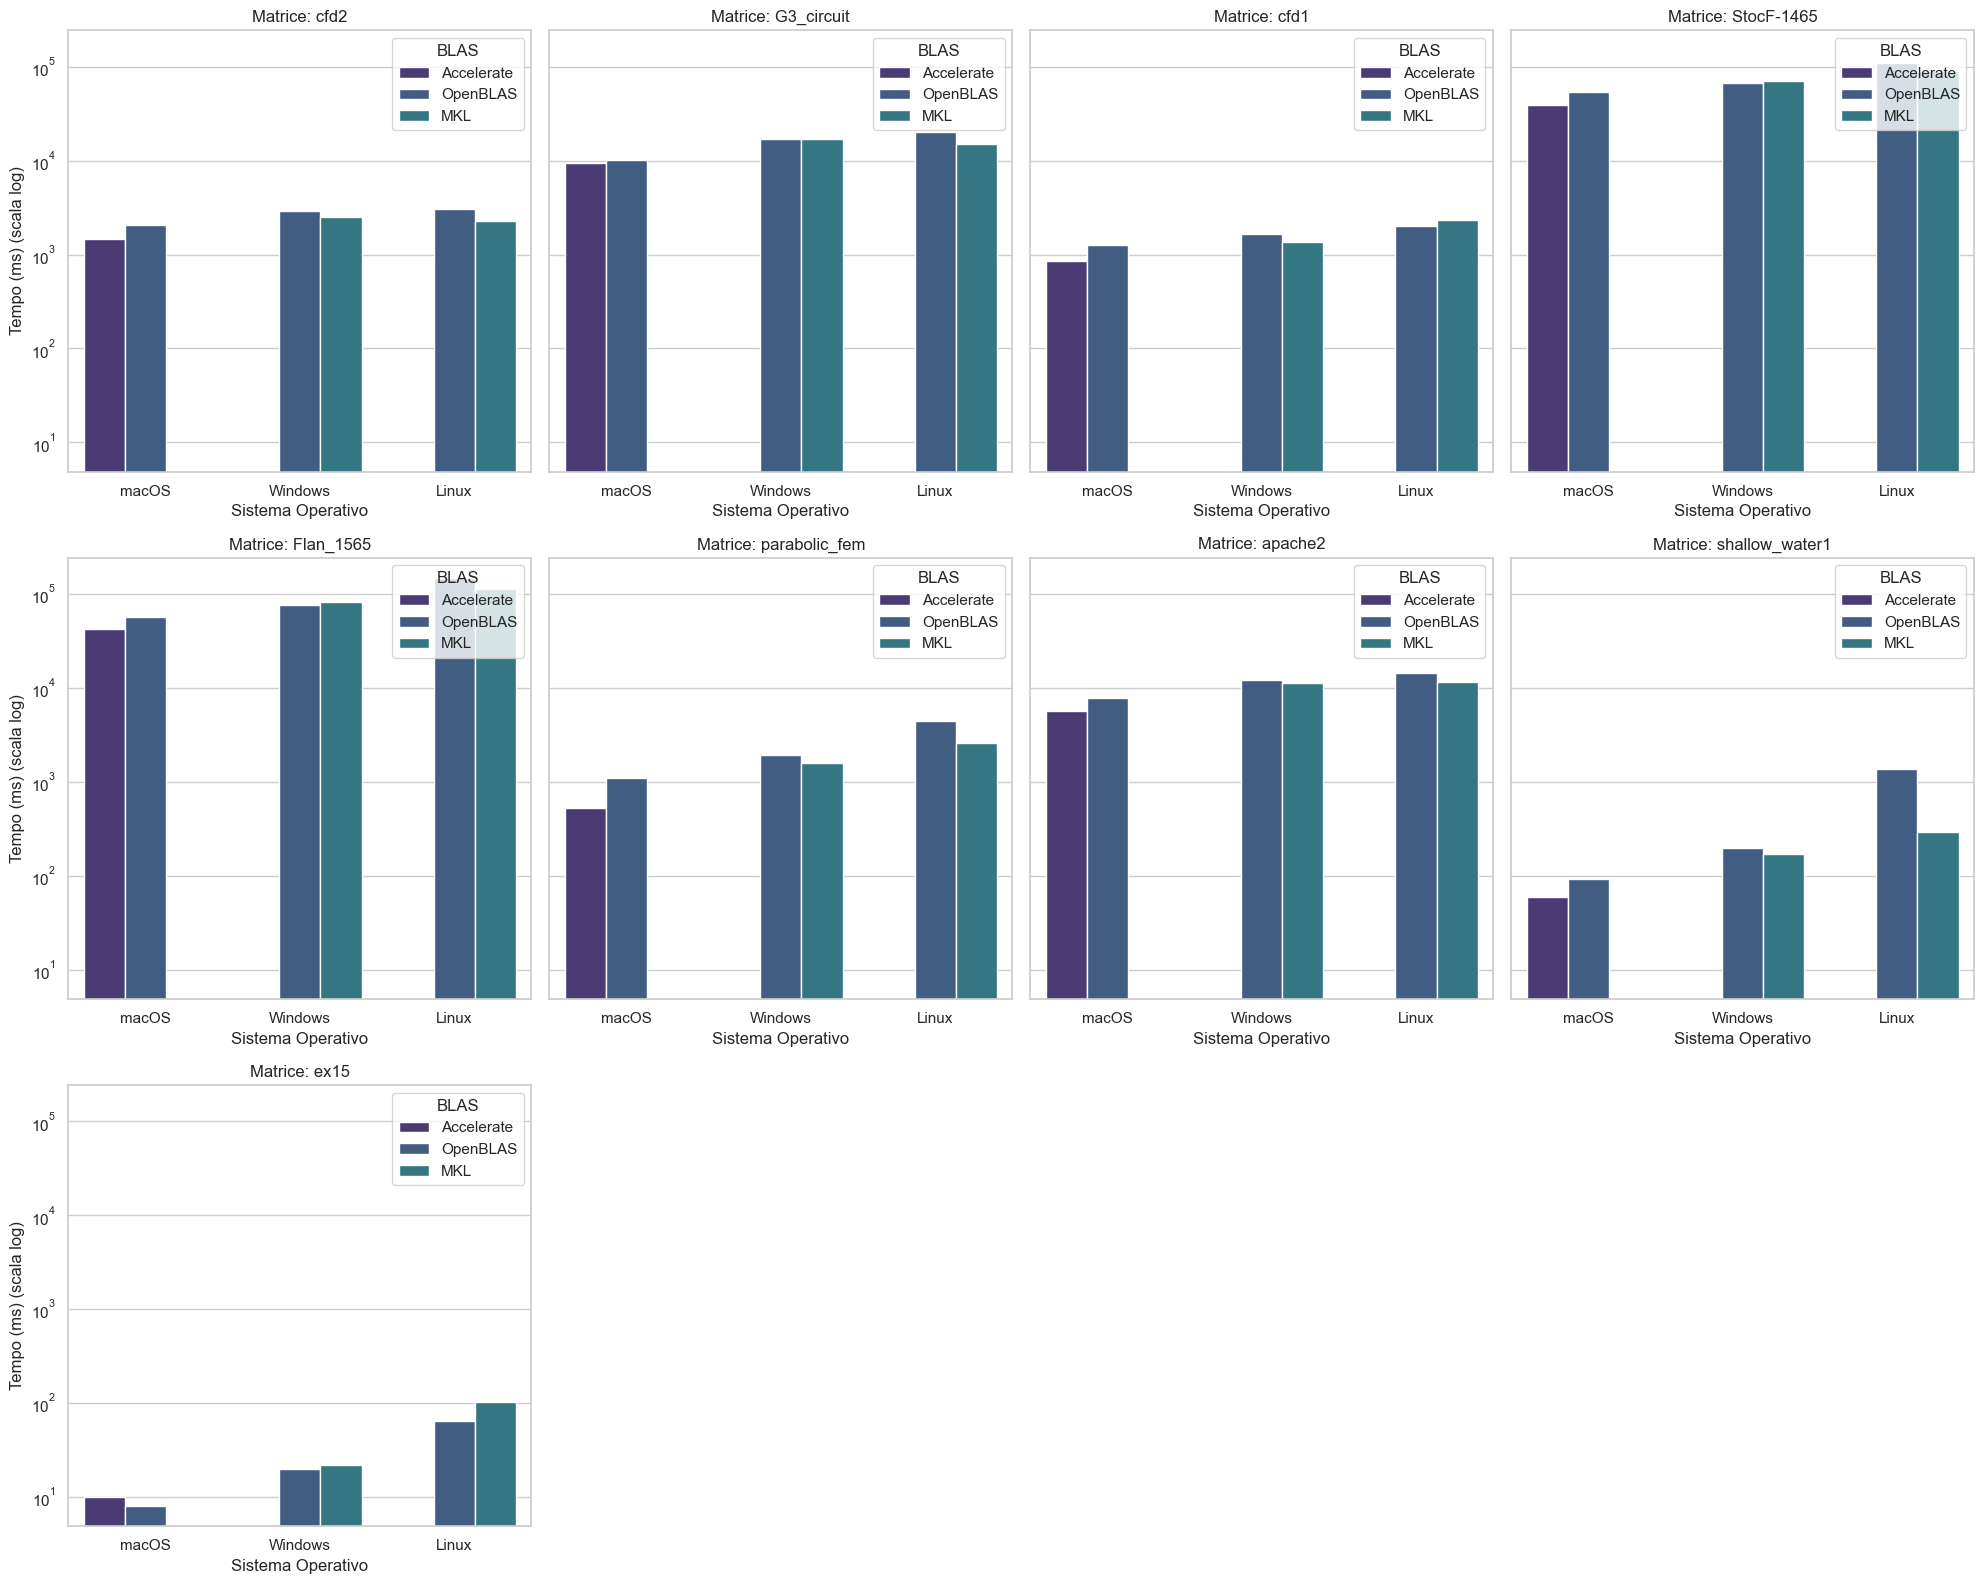

In [78]:
# Grafico heatmap per confrontare tempi di decomposizione tra tutte le matrici
def create_decomp_heatmap(df, figsize=(16, 12)):
    """
    Crea un heatmap che mostra i tempi di decomposizione per ogni combinazione
    di matrice, OS e BLAS, permettendo di identificare facilmente la combinazione migliore.
    """
    # Pivot dei dati per creare una tabella matrice vs combinazione OS-BLAS
    pivot_df = df.pivot_table(
        index='matrixName', 
        columns=['os', 'blas'], 
        values='decompTime',
        aggfunc='mean'
    )
    
    # Ordiniamo le matrici per il valore medio di decompTime (dal più veloce al più lento)
    mean_decomp_time = pivot_df.mean(axis=1)
    pivot_df = pivot_df.loc[mean_decomp_time.sort_values().index]
    
    # Creazione dell'heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_df, annot=True, fmt='.2e', cmap='viridis_r', 
                linewidths=.5, cbar_kws={'label': 'Tempo di decomposizione (ms)'})
    
    plt.title('Confronto tempi di decomposizione per ogni combinazione matrice/OS/BLAS', fontsize=16)
    plt.ylabel('Matrice', fontsize=14)
    plt.xlabel('OS - BLAS', fontsize=14)
    plt.tight_layout()
    plt.savefig('report/images/C++/decompTime_heatmap.png')
    plt.show()

# Grafico a barre con le matrici ordinate per tempo di decomposizione
def create_decomp_ranked_bar(df, figsize=(18, 14)):
    """
    Crea un grafico a barre ordinato che mostra le combinazioni matrice-OS-BLAS
    ordinate dal tempo di decomposizione più basso al più alto.
    """
    # Creiamo una copia e aggiungiamo una colonna combinata matrice-OS-BLAS
    plot_df = df.copy()
    plot_df['matrix_os_blas'] = plot_df['matrixName'] + ' | ' + plot_df['os'] + ' - ' + plot_df['blas']
    
    # Ordiniamo per tempo di decomposizione
    plot_df = plot_df.sort_values('decompTime')
    
    # Prendiamo le prime 50 combinazioni per mantenere il grafico leggibile
    # (modifica questo numero in base alle tue esigenze)
    top_n = len(plot_df)
    plot_df = plot_df.head(top_n)
    
    # Creazione del grafico a barre
    plt.figure(figsize=figsize)
    plt.xscale('log')
    ax = sns.barplot(x='decompTime', y='matrix_os_blas', data=plot_df, 
                    hue='os', dodge=False, palette='viridis')
    
    # Aggiungi etichette per i valori di decompTime
    for i, v in enumerate(plot_df['decompTime']):
        ax.text(v + 0.1, i, f'{v:.2f}', va='center')
    
    plt.title(f'Top {top_n} combinazioni matrice-OS-BLAS con tempi di decomposizione più bassi', fontsize=16)
    plt.xlabel('Tempo di decomposizione (ms)', fontsize=14)
    plt.ylabel('Matrice | OS - BLAS', fontsize=14)
    plt.grid(axis='x')
    plt.legend(title='Sistema Operativo', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('report/images/C++/decompTime_ranked_bar.png')
    plt.show()

# Facet grid per confrontare visivamente le matrici
def create_matrix_facet_grid(df, figsize=(20, 16)):
    """
    Crea una griglia di grafici a barre, uno per ogni matrice, che mostra
    i tempi di decomposizione per ogni combinazione OS-BLAS.
    """
    # Prepariamo i dati
    plot_df = df.copy()
    
    # Determiniamo il numero di righe e colonne per la griglia
    matrices = plot_df['matrixName'].unique()
    n_matrices = len(matrices)
    ncols = min(4, n_matrices)
    nrows = (n_matrices + ncols - 1) // ncols
    
    # Creiamo la griglia di grafici
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharey=True)
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    
    # Per ogni matrice, creiamo un grafico a barre
    for i, matrix in enumerate(matrices):
        if i < len(axes):
            subset = plot_df[plot_df['matrixName'] == matrix]
            ax = sns.barplot(x='os', y='decompTime', hue='blas', data=subset, ax=axes[i])
            ax.set_title(f'Matrice: {matrix}')
            ax.set_yscale('log')
            ax.set_xlabel('Sistema Operativo')
            ax.set_ylabel('Tempo (ms) (scala log)')
            ax.legend(title='BLAS')
    
    # Nascondiamo gli assi vuoti rimanenti
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('report/images/C++/decompTime_facet_grid.png')
    plt.show()

# Esecuzione delle funzioni
print("Creazione heatmap per confronto dei tempi di decomposizione...")
create_decomp_heatmap(bench_df)

print("Creazione grafico a barre ordinato per i tempi di decomposizione...")
create_decomp_ranked_bar(bench_df)

print("Creazione facet grid per confronto dei tempi di decomposizione...")
create_matrix_facet_grid(bench_df)


Creazione grafici di confronto BLAS per decompTime...


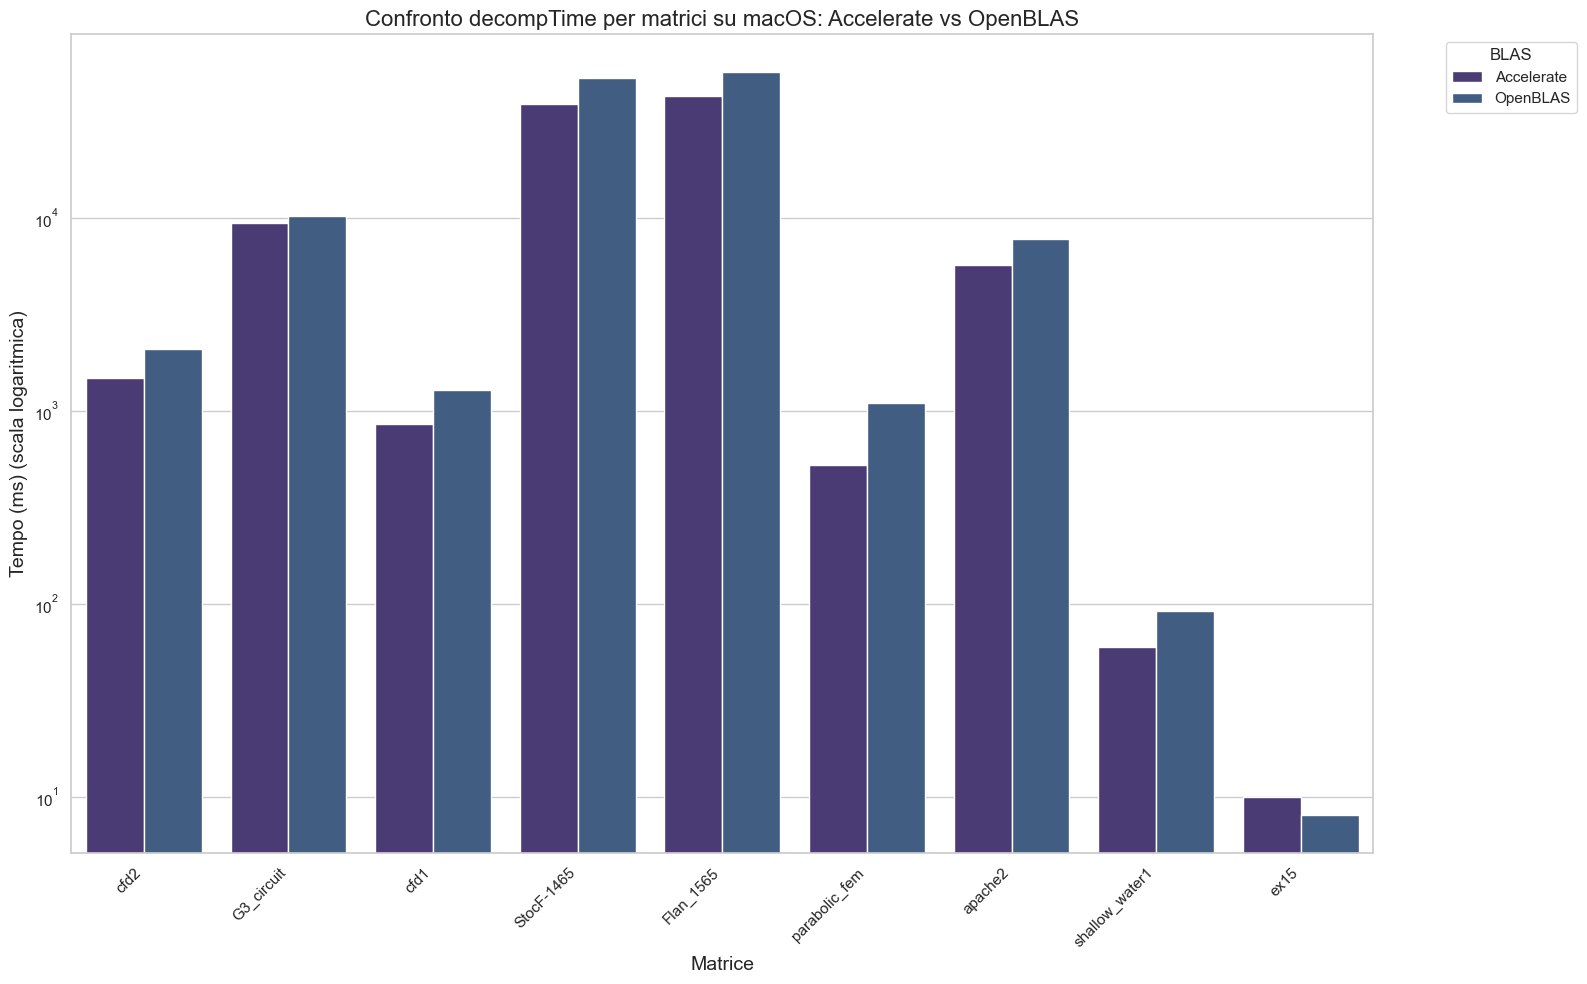

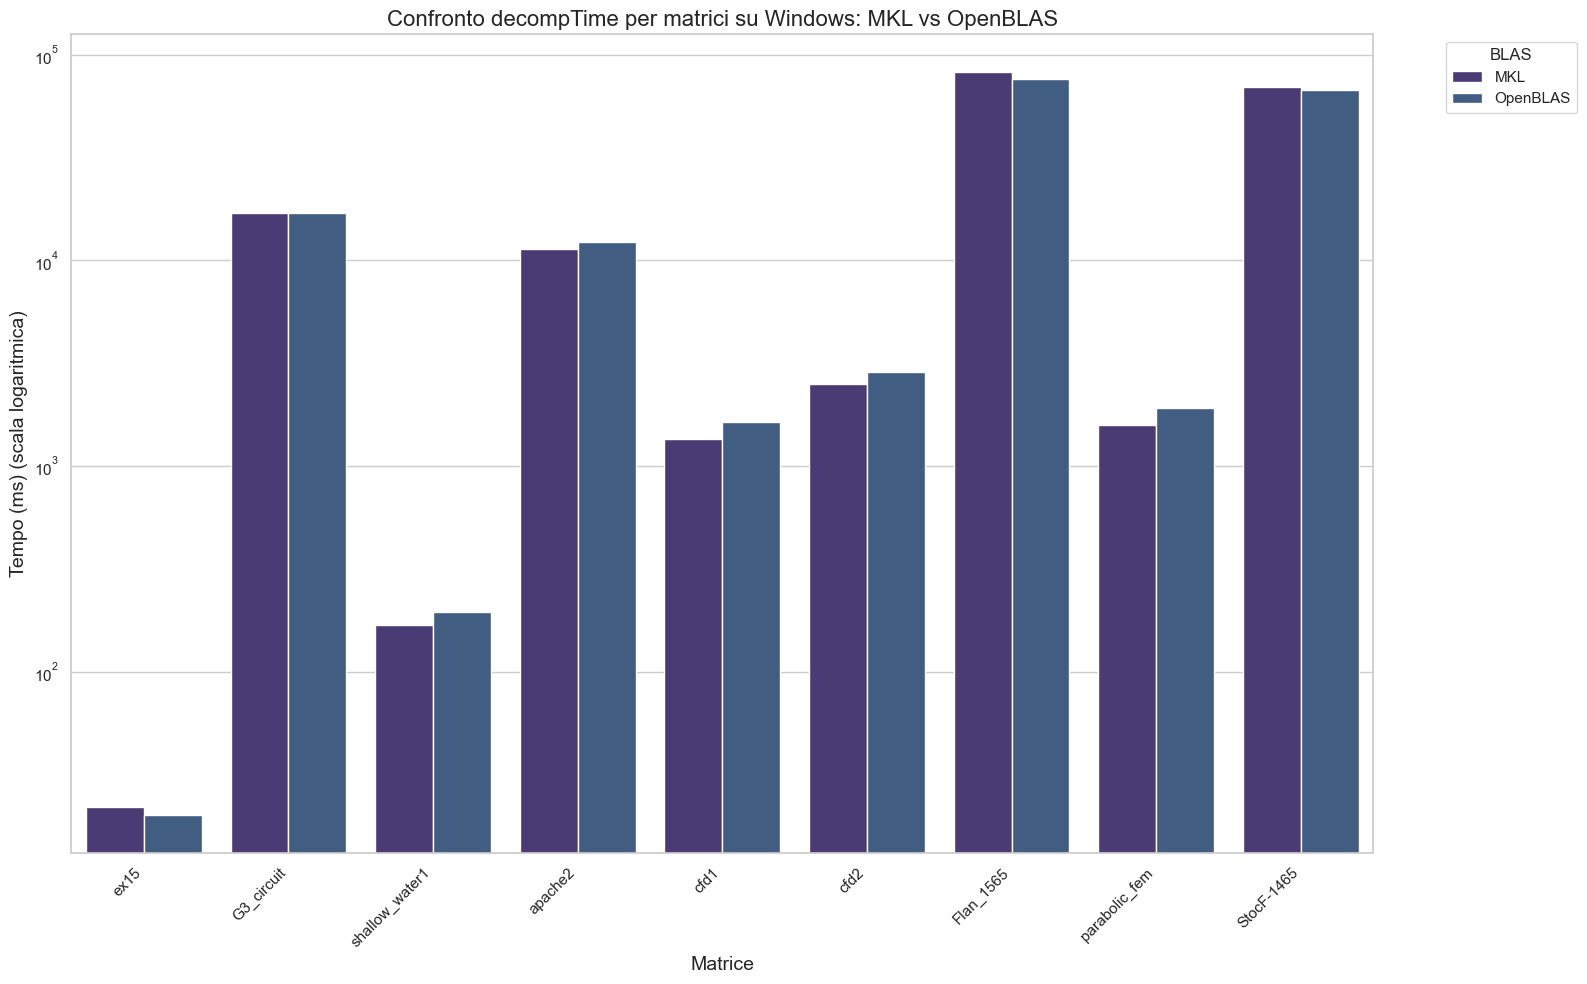

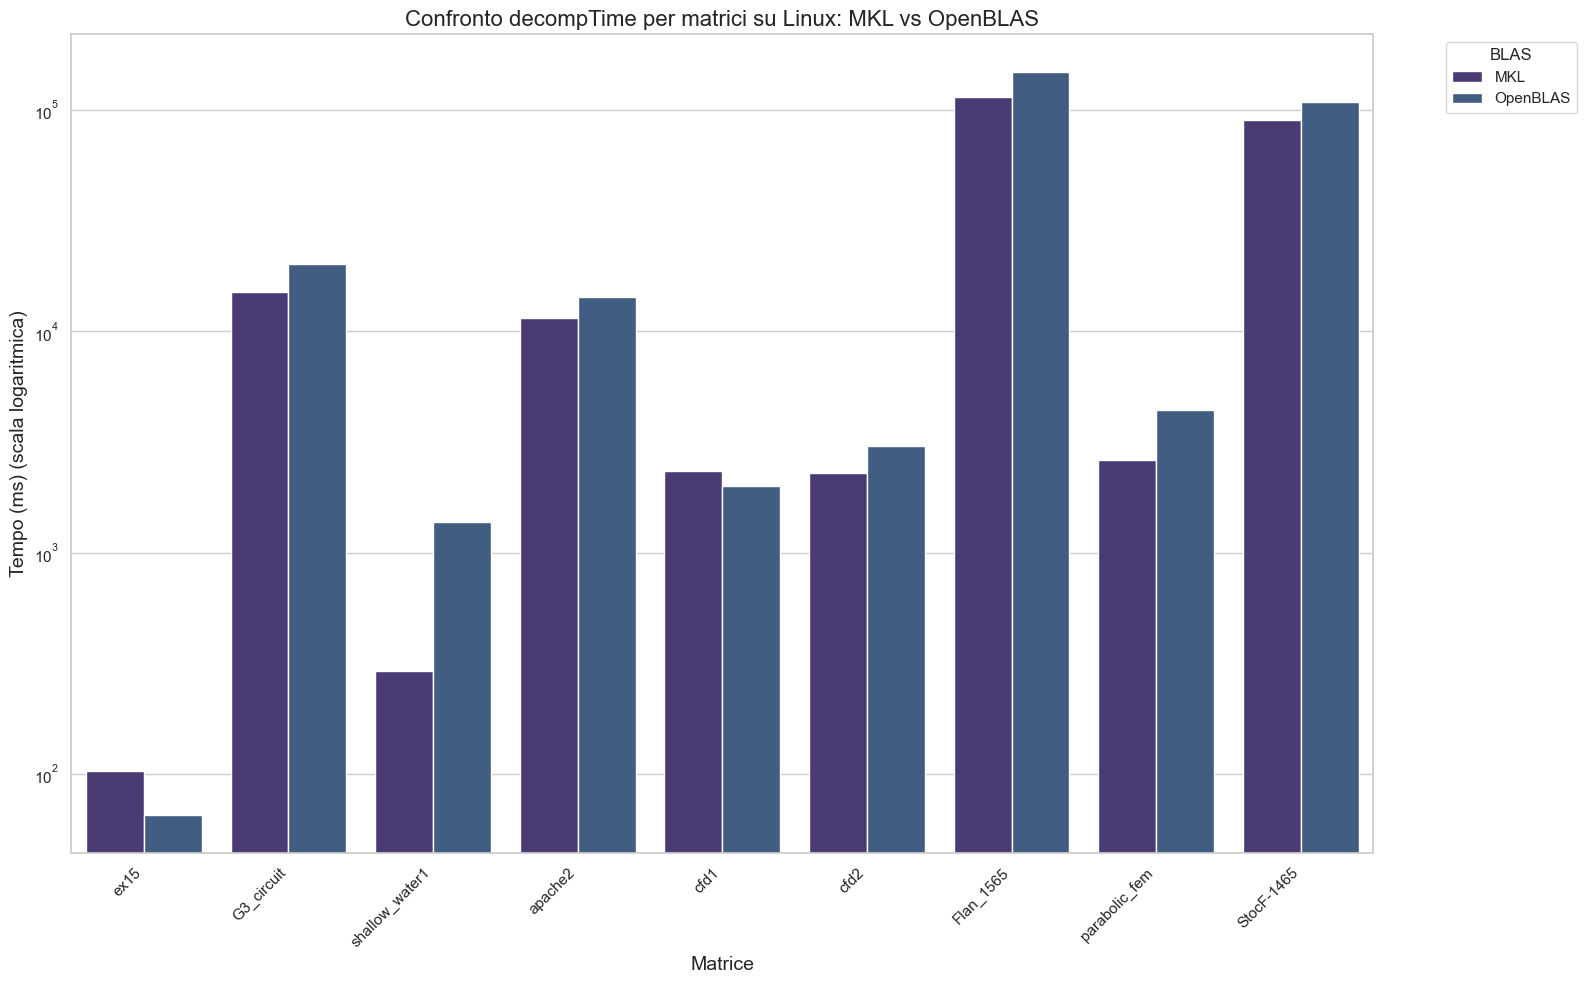


Creazione grafici di confronto BLAS per solveTime...


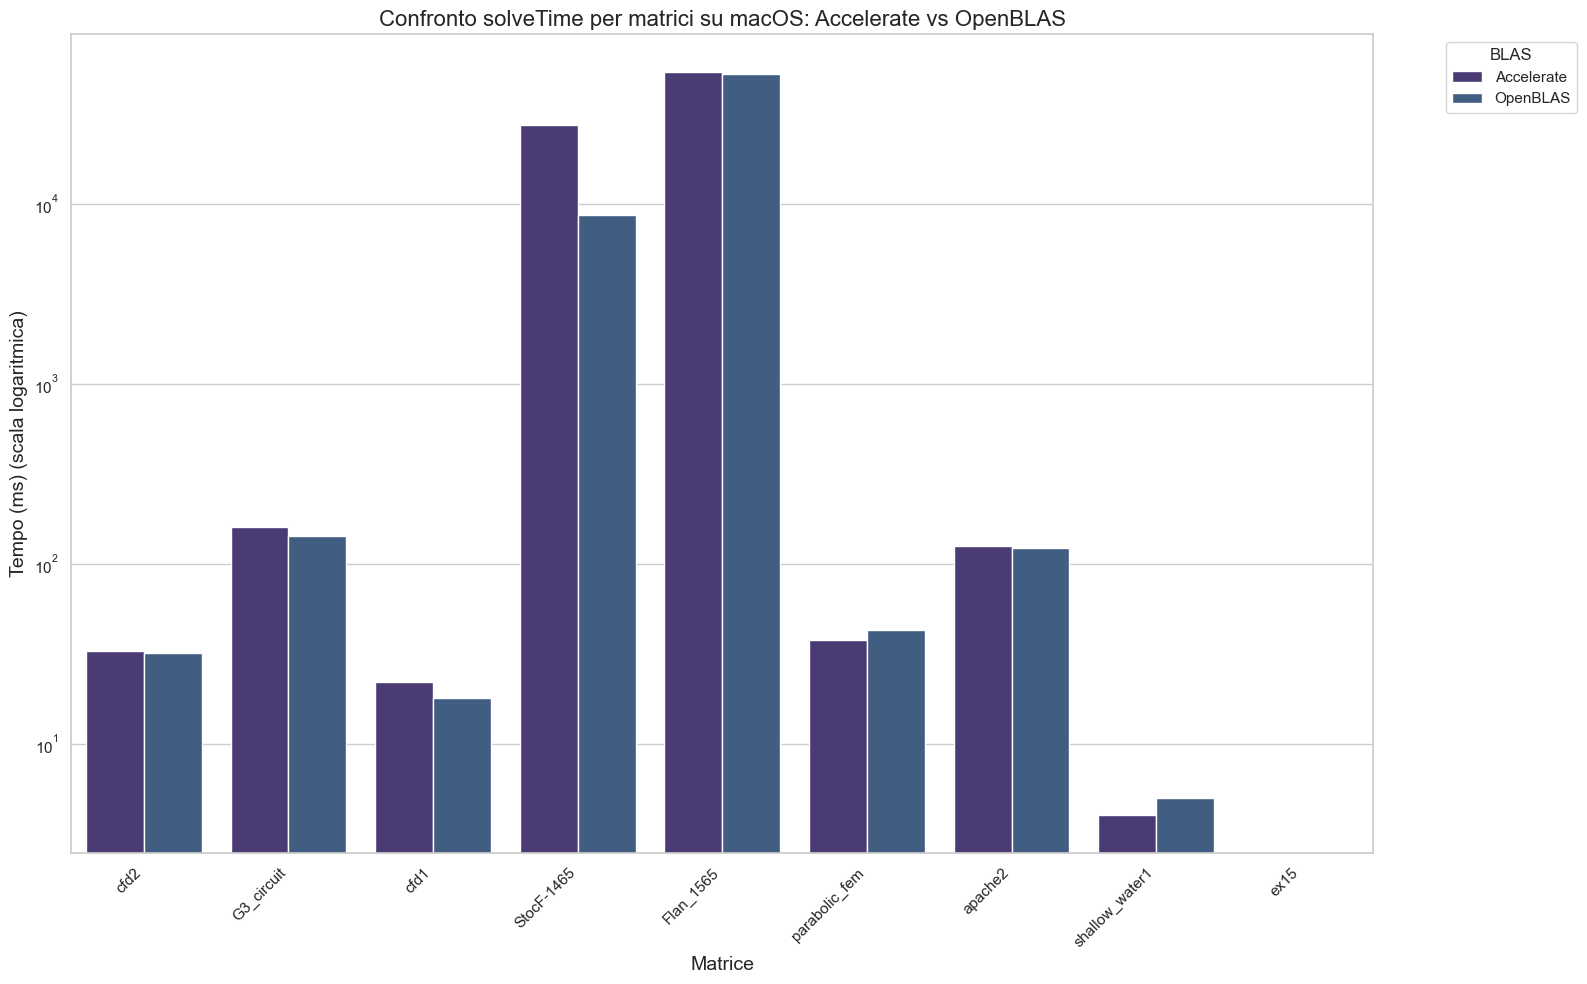

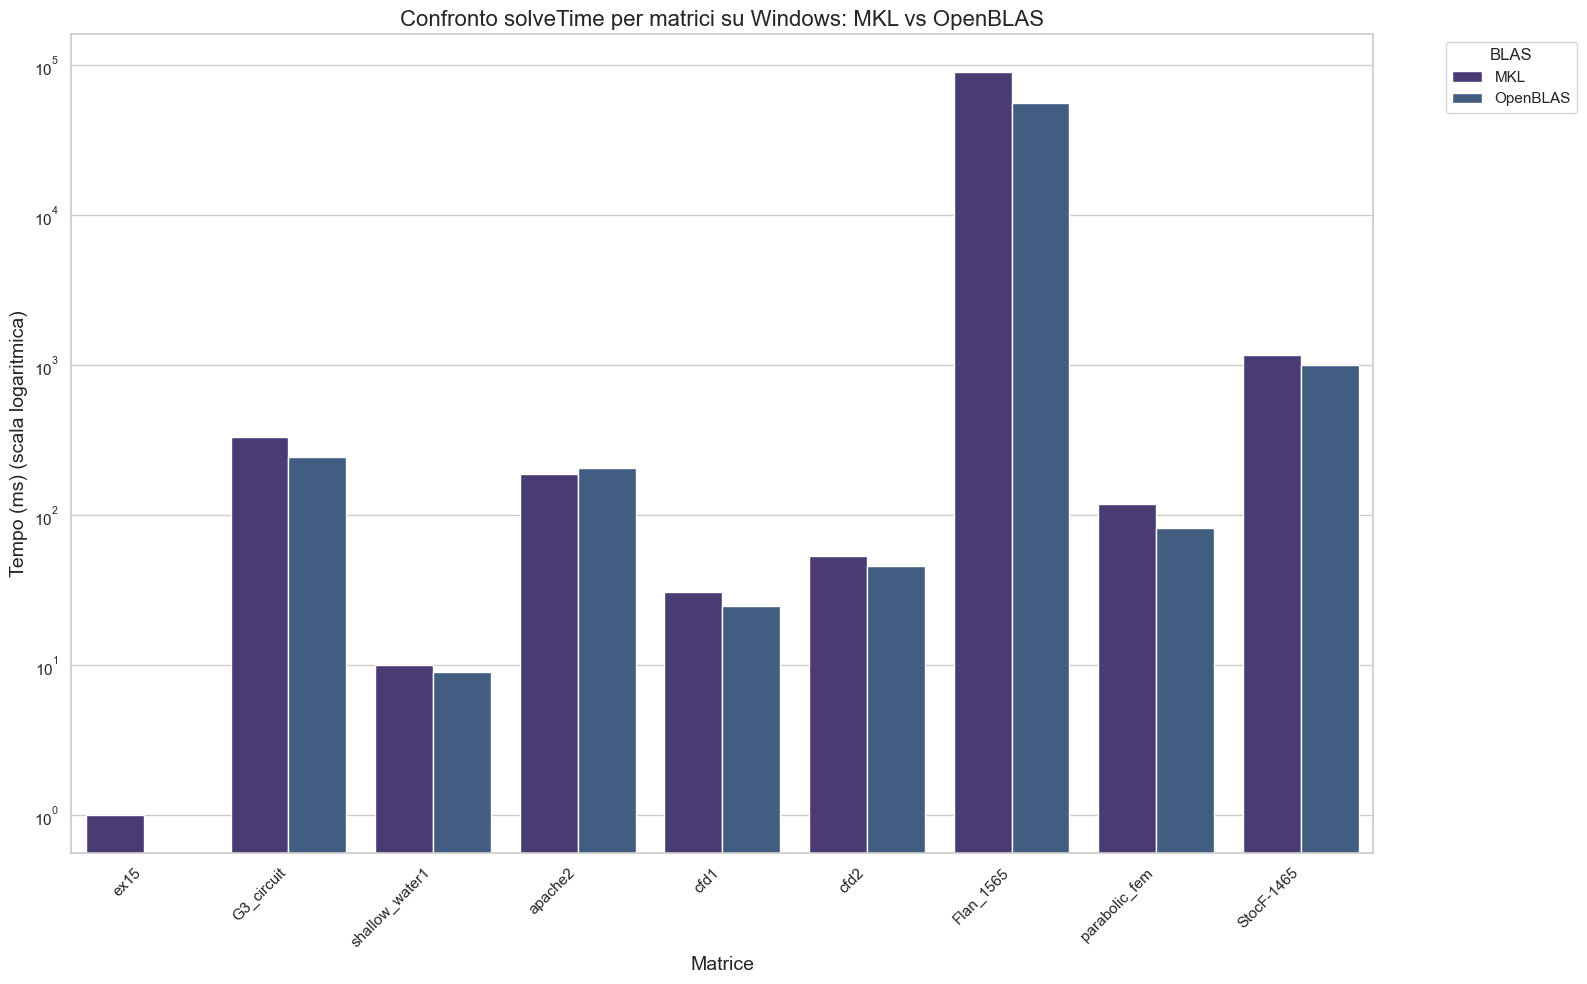

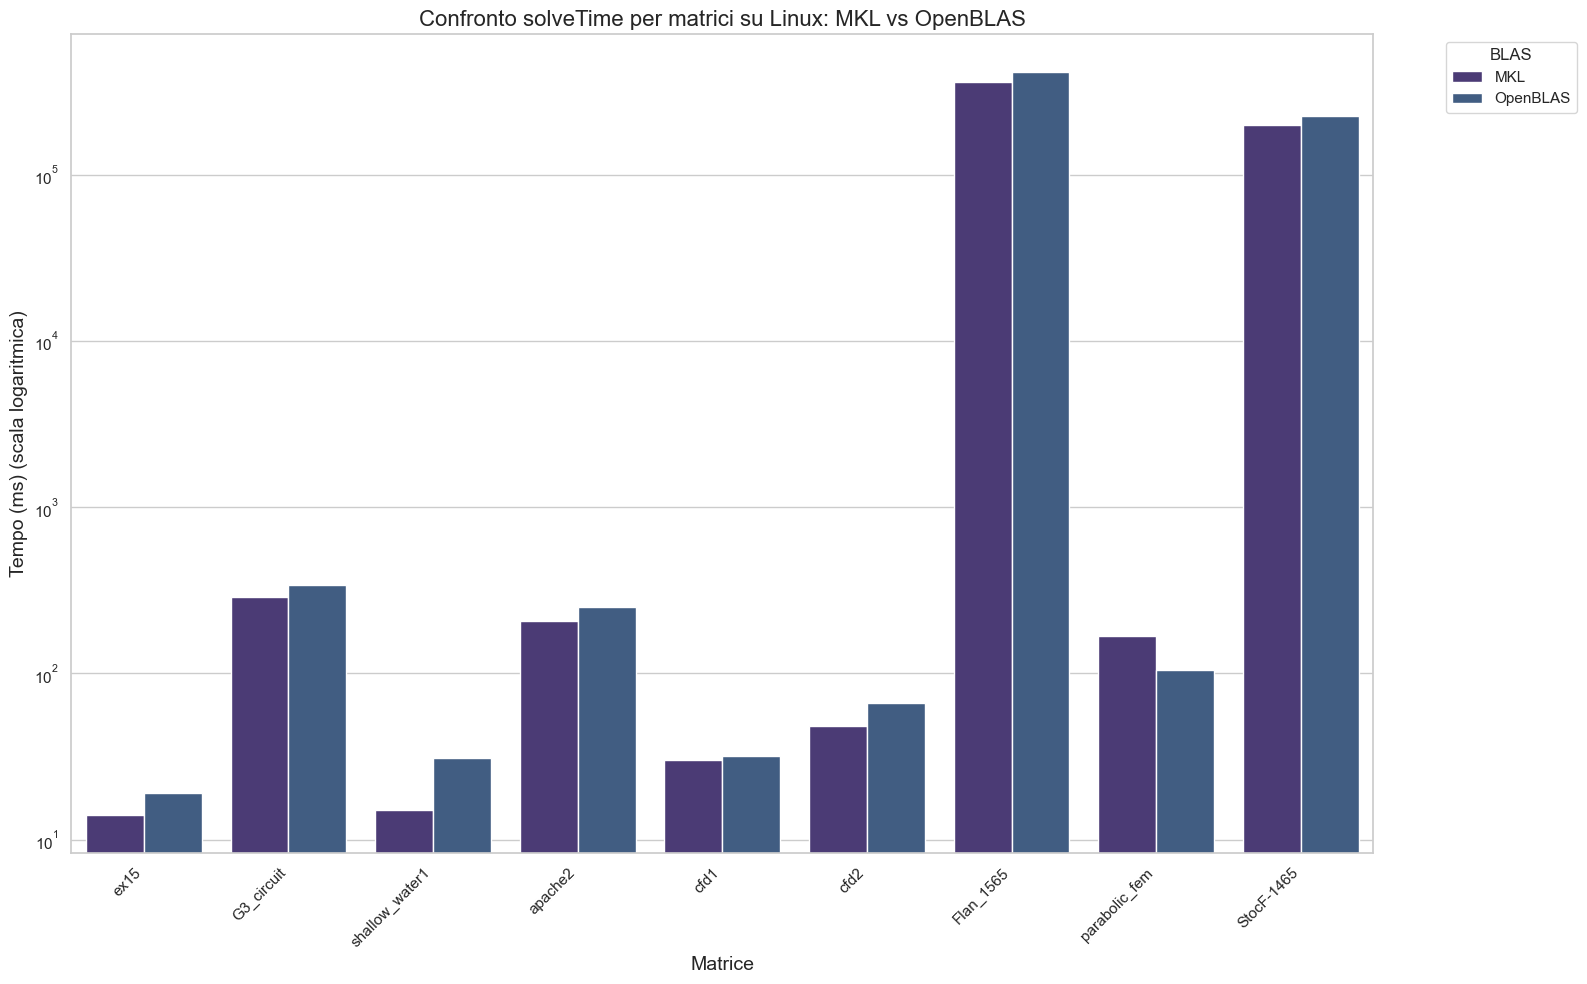


Creazione grafici di confronto BLAS per error...


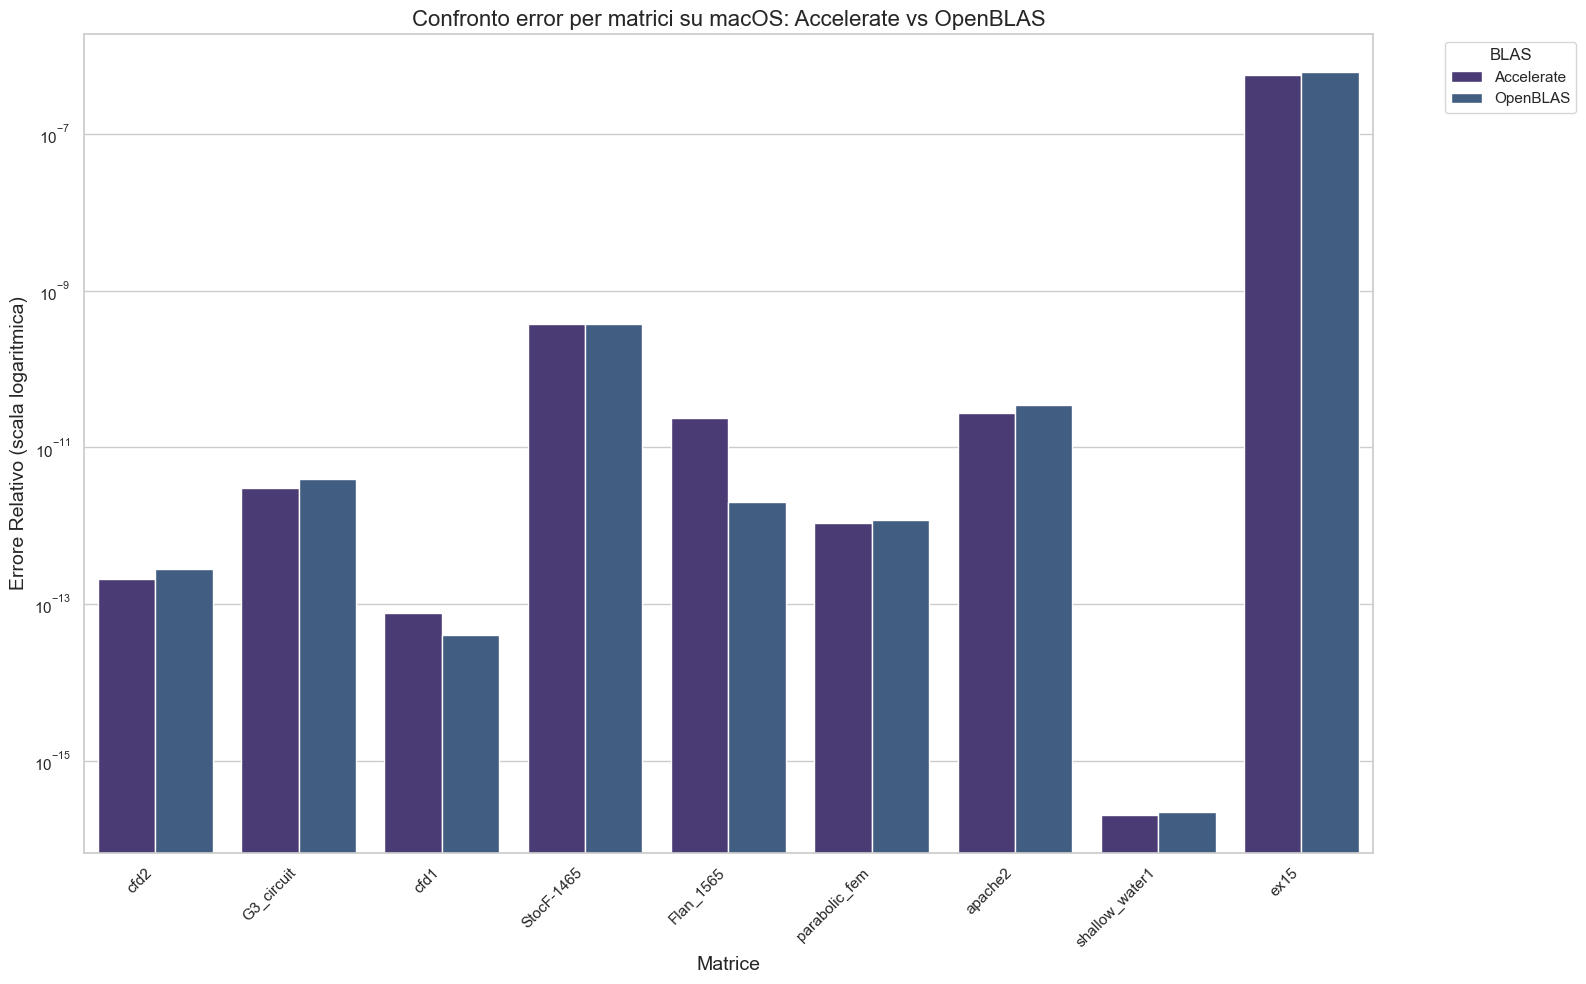

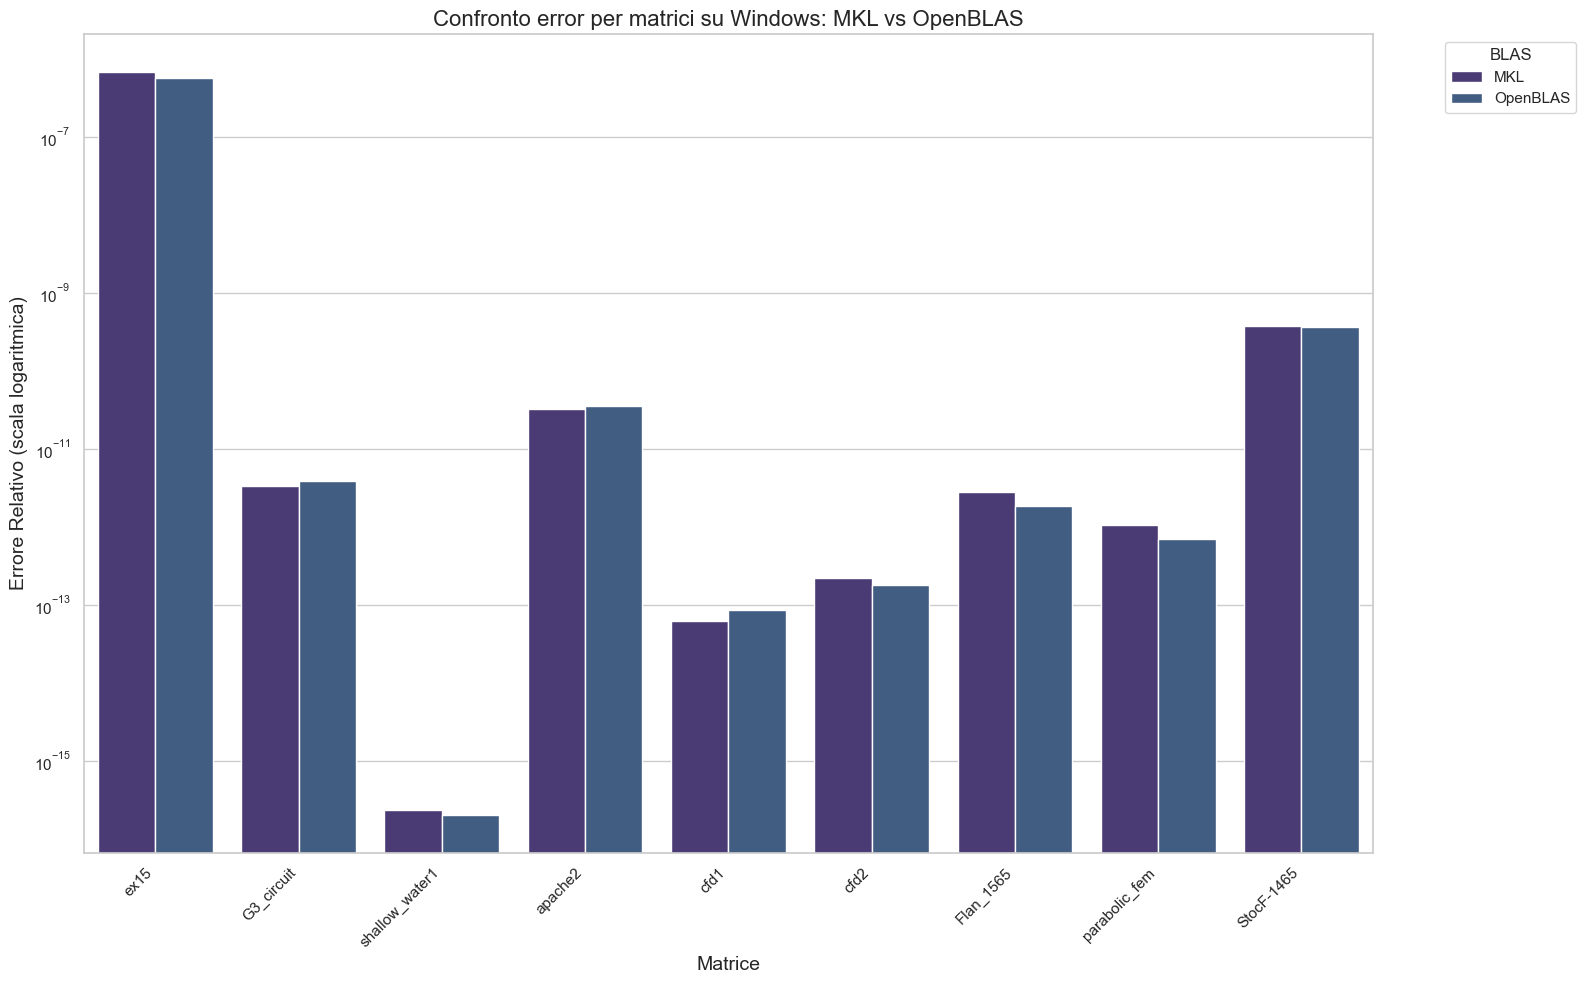

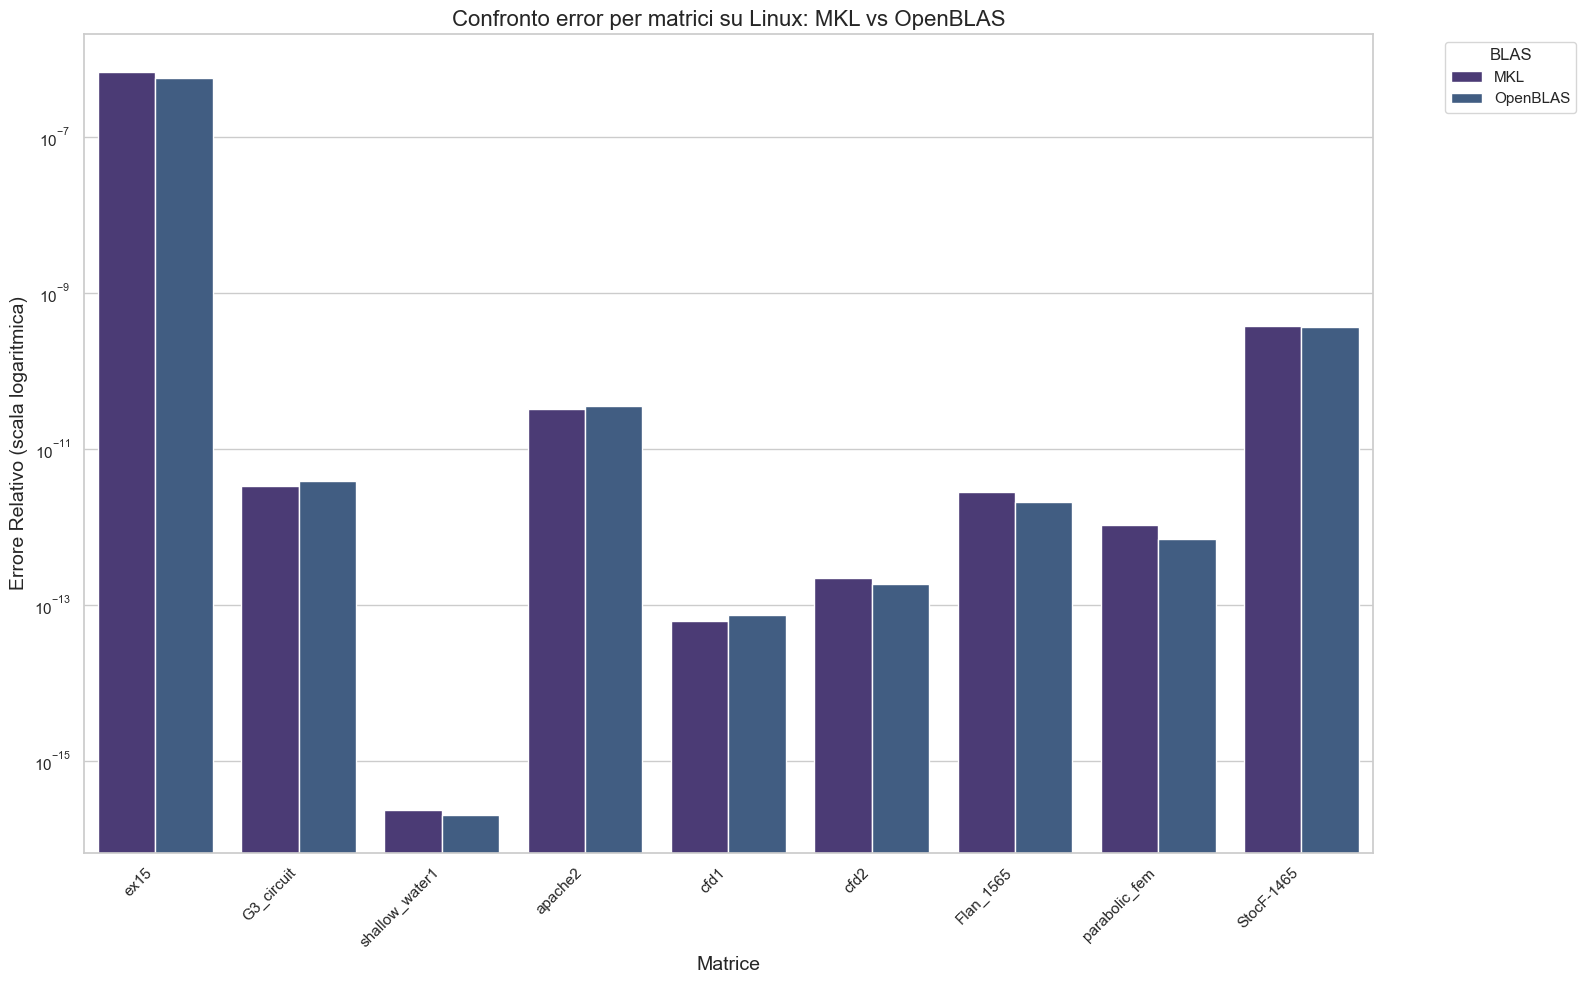

In [79]:
# Funzione modificata per confrontare implementazioni BLAS specifiche per OS
def create_matrix_barplots(df, metric_name, figsize=(16, 10)):
    """
    Crea grafici a barre con le matrici sull'asse X, confrontando:
    - Accelerate vs OpenBLAS per MacOS
    - MKL vs OpenBLAS per Windows e Linux
    
    Args:
        df: DataFrame con i dati
        metric_name: nome della metrica da visualizzare (es. 'loadMem')
        figsize: dimensioni del grafico
    """
    # Verifichiamo che esista la colonna MatrixName
    if 'matrixName' not in df.columns:
        print(f"Errore: colonna 'matrixName' non trovata. Colonne disponibili: {df.columns.tolist()}")
        return
    
    # Creiamo una copia del dataframe
    data = df.copy()
    
    # Otteniamo l'elenco unico di matrici e sistemi operativi
    matrices = data['matrixName'].unique()
    os_list = data['os'].unique()
    
    # Per ogni sistema operativo, creiamo un grafico separato
    for os_name in os_list:
        # Filtriamo i dati per questo OS
        os_data = data[data['os'] == os_name]
        
        # Definiamo le implementazioni BLAS da confrontare
        if os_name == 'macOS':
            blas_to_compare = ['Accelerate', 'OpenBLAS']
        else:  # Windows o Linux
            blas_to_compare = ['MKL', 'OpenBLAS']
        
        # Filtriamo per le implementazioni BLAS pertinenti
        os_data = os_data[os_data['blas'].isin(blas_to_compare)]
        
        # Se non abbiamo dati per questo OS, continuiamo con il prossimo
        if len(os_data) == 0:
            print(f"Nessun dato disponibile per {os_name} con BLAS: {blas_to_compare}")
            continue
        
        # Creiamo il grafico
        plt.figure(figsize=figsize)
        ax = sns.barplot(x='matrixName', y=metric_name, hue='blas', data=os_data)
        
        plt.yscale('log')

        # Formattiamo il grafico
        plt.title(f'Confronto {metric_name} per matrici su {os_name}: {" vs ".join(blas_to_compare)}', fontsize=16)
        plt.xlabel('Matrice', fontsize=14)
        
        # Etichetta Y appropriata in base alla metrica
        if 'Time' in metric_name:
            plt.ylabel('Tempo (ms) (scala logaritmica)', fontsize=14)
        elif 'Mem' in metric_name:
            plt.ylabel('Memoria (Bytes) (scala logaritmica)', fontsize=14)
        elif 'error' in metric_name:
            plt.ylabel('Errore Relativo (scala logaritmica)', fontsize=14)
        else:
            plt.ylabel(metric_name + ' (scala logaritmica)', fontsize=14)
                
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='BLAS', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        
        # Salviamo e mostriamo il grafico
        plt.savefig(f'report/images/C++/{os_name}/{metric_name}_comparison.png')
        plt.show()

# Esempio di utilizzo della funzione modificata
# Metriche da visualizzare
metrics = ['decompTime', 'solveTime', 'error']

# Esecuzione della funzione per ogni metrica
for metric in metrics:
    print(f"\nCreazione grafici di confronto BLAS per {metric}...")
    create_matrix_barplots(bench_df, metric)

Righe rimosse dal dataframe MATLAB Windows: 2
Righe rimosse dal dataframe MATLAB Linux: 0

Creazione grafici di confronto per decompTime...


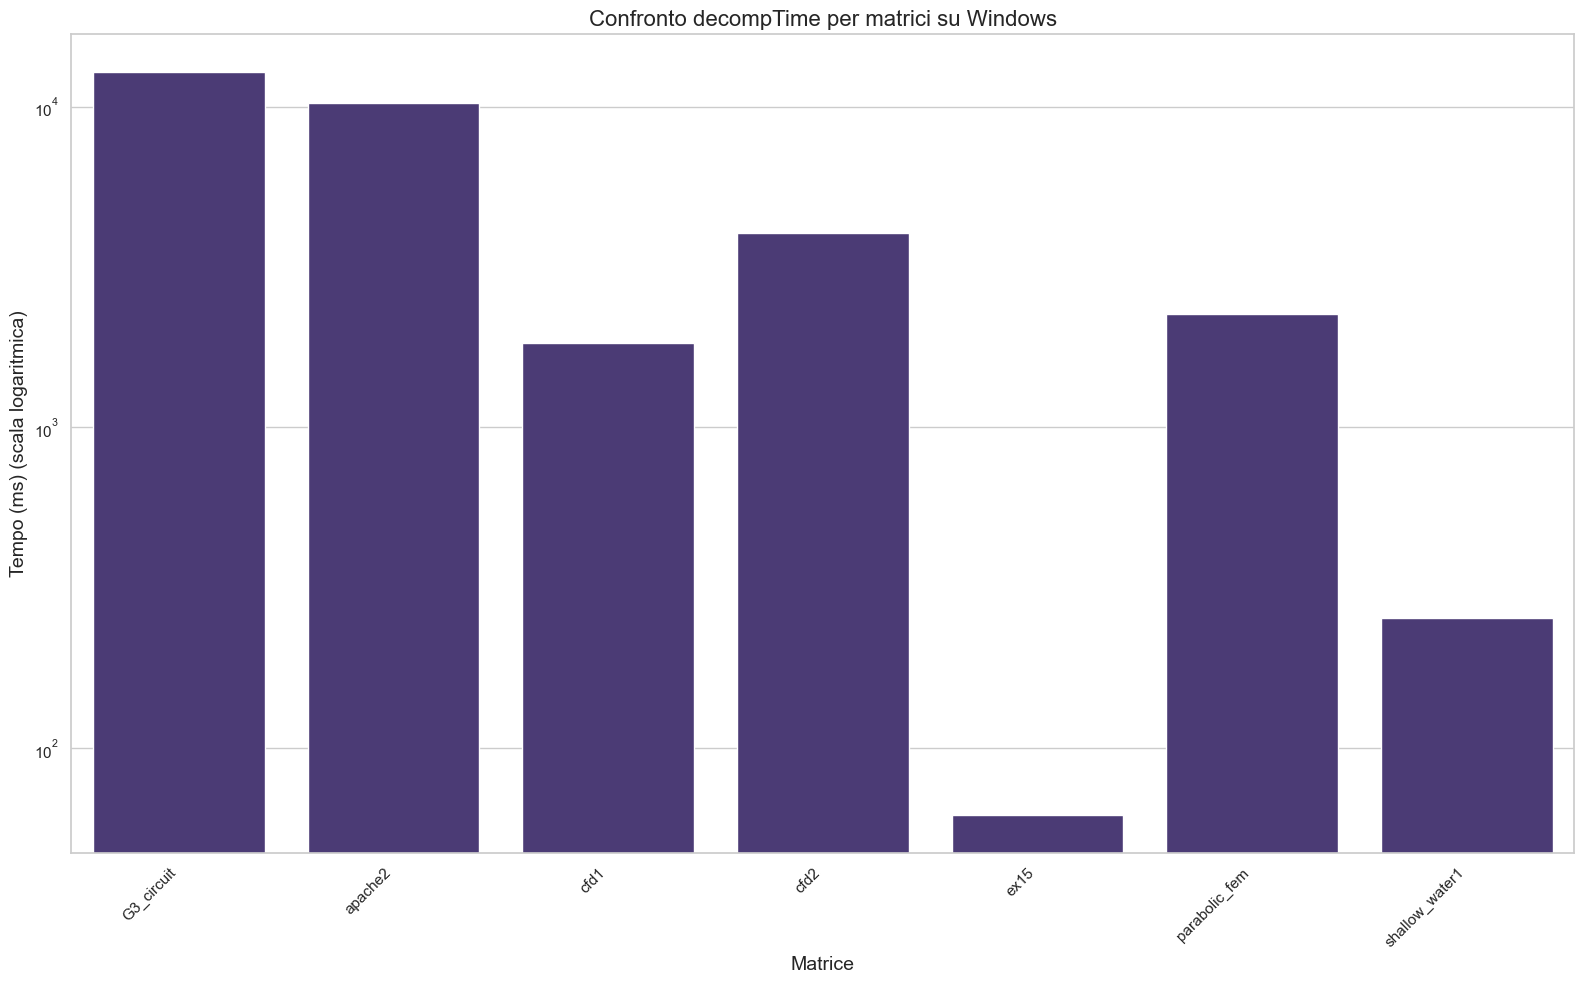

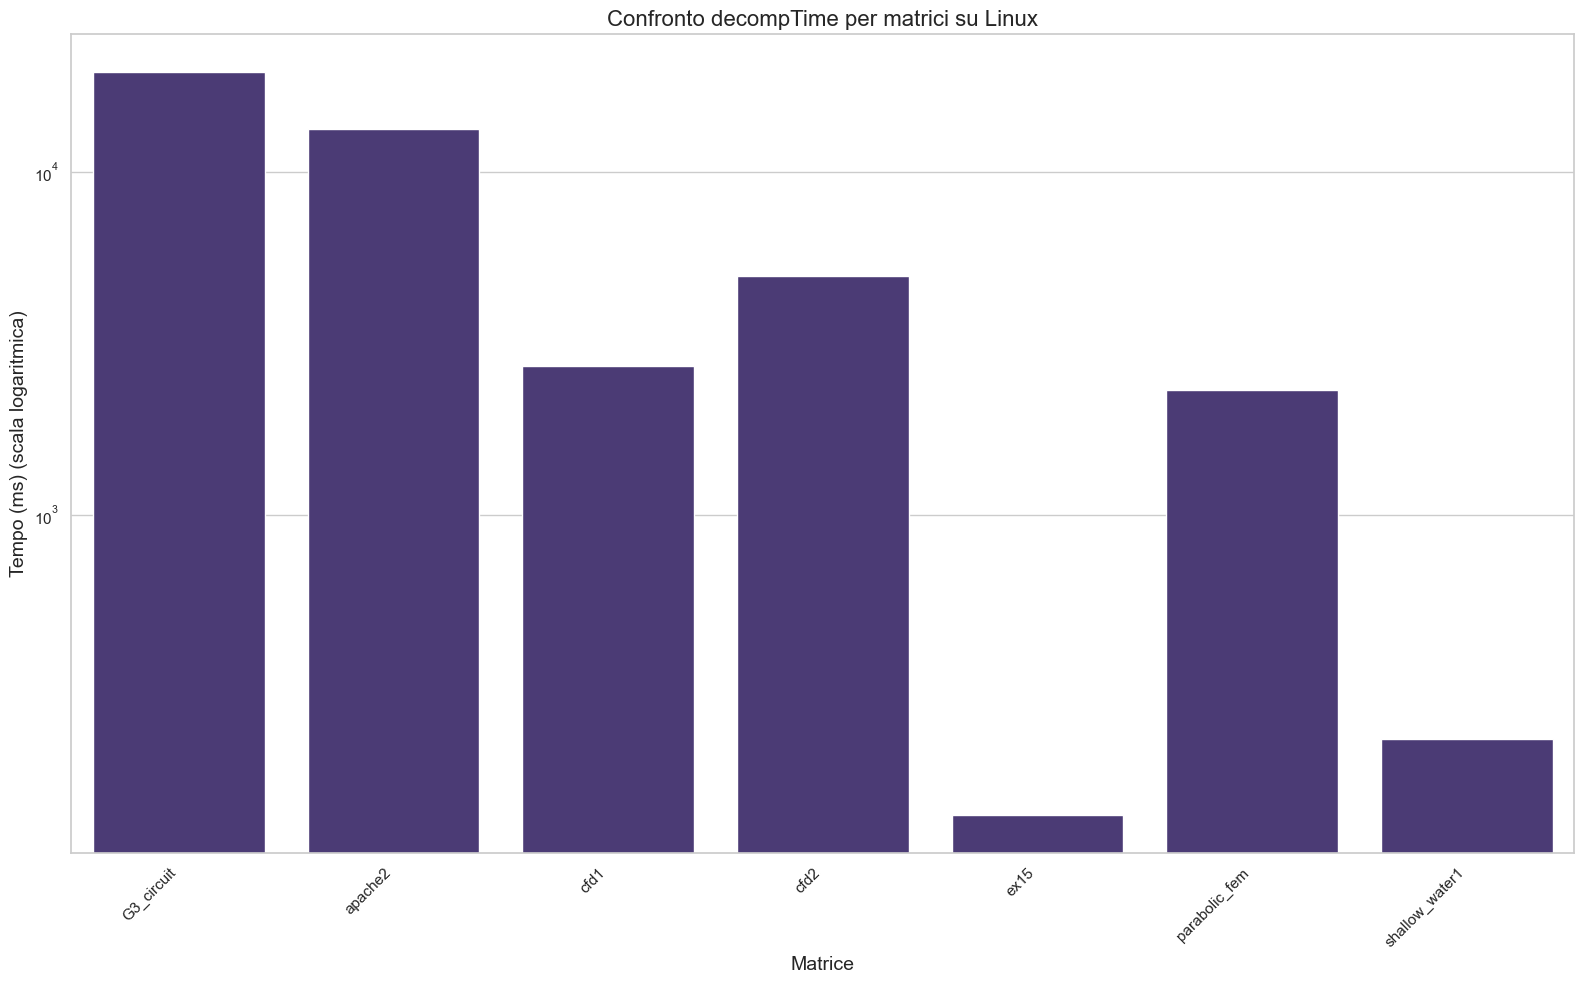


Creazione grafici di confronto per solveTime...


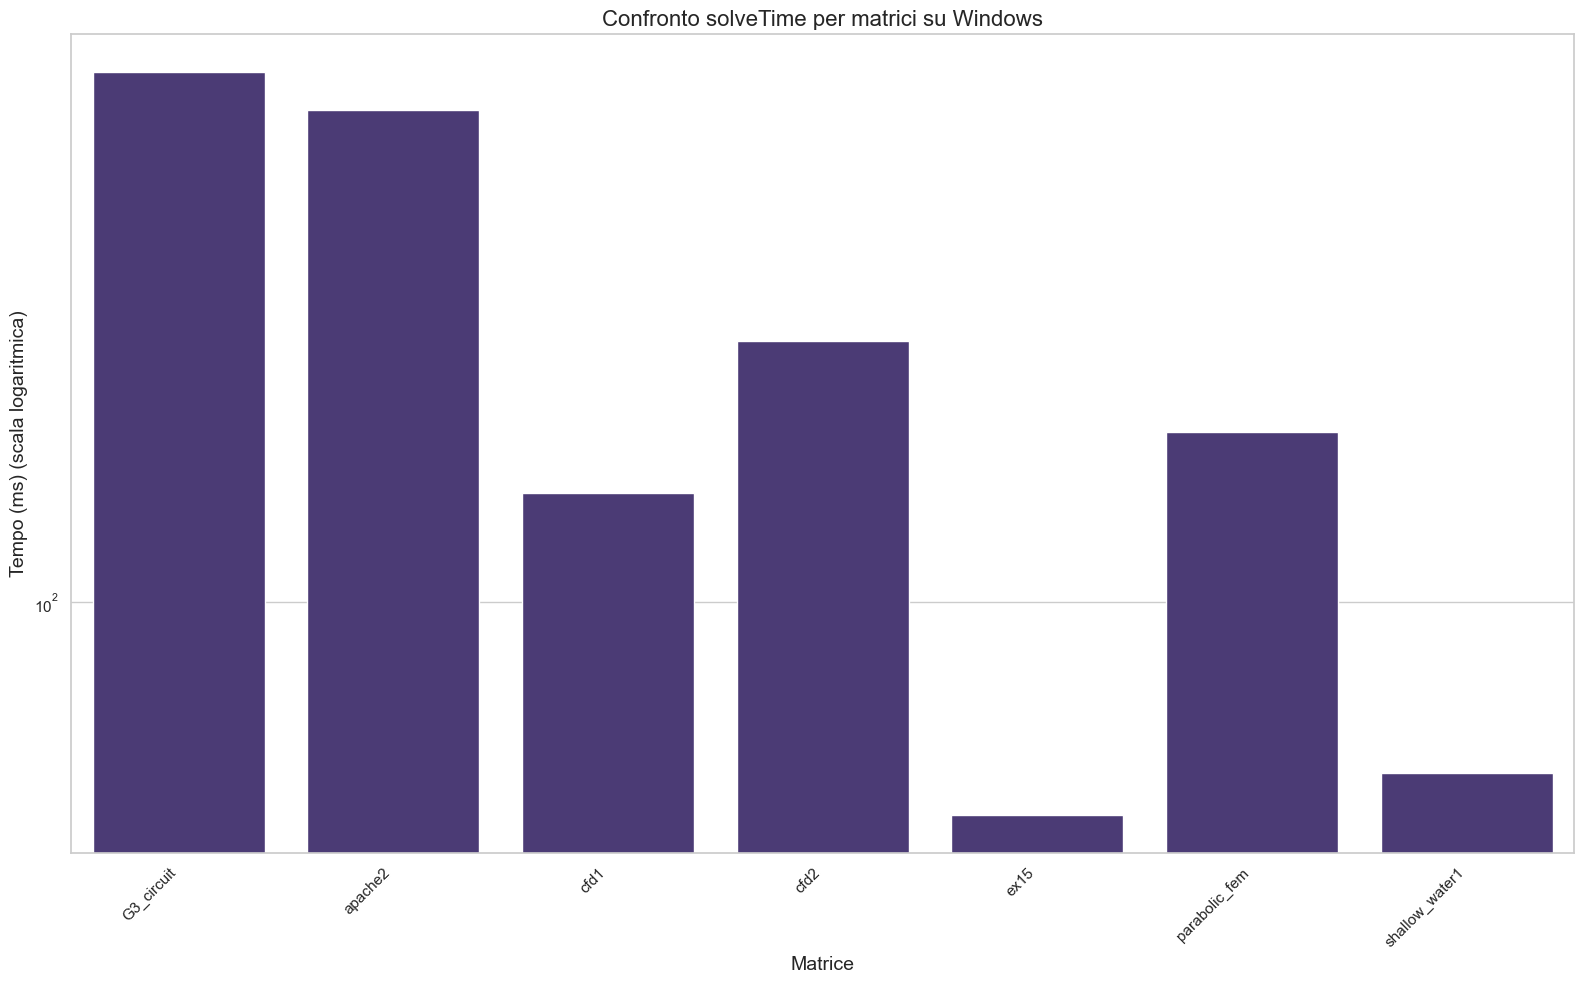

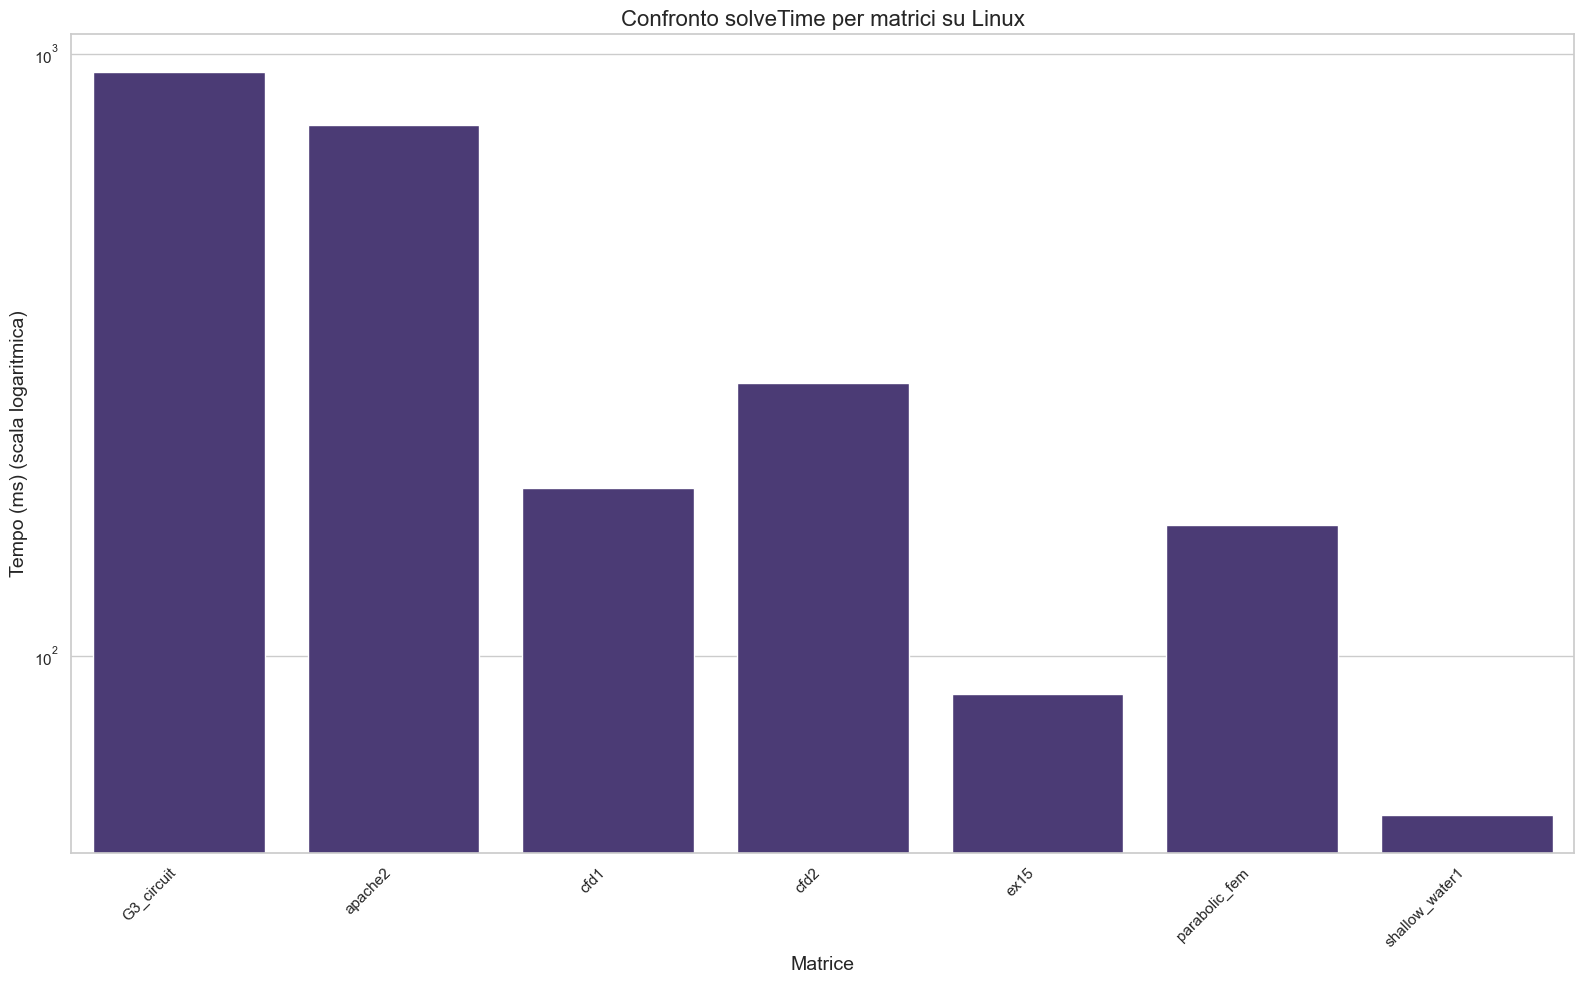


Creazione grafici di confronto per relativeError...


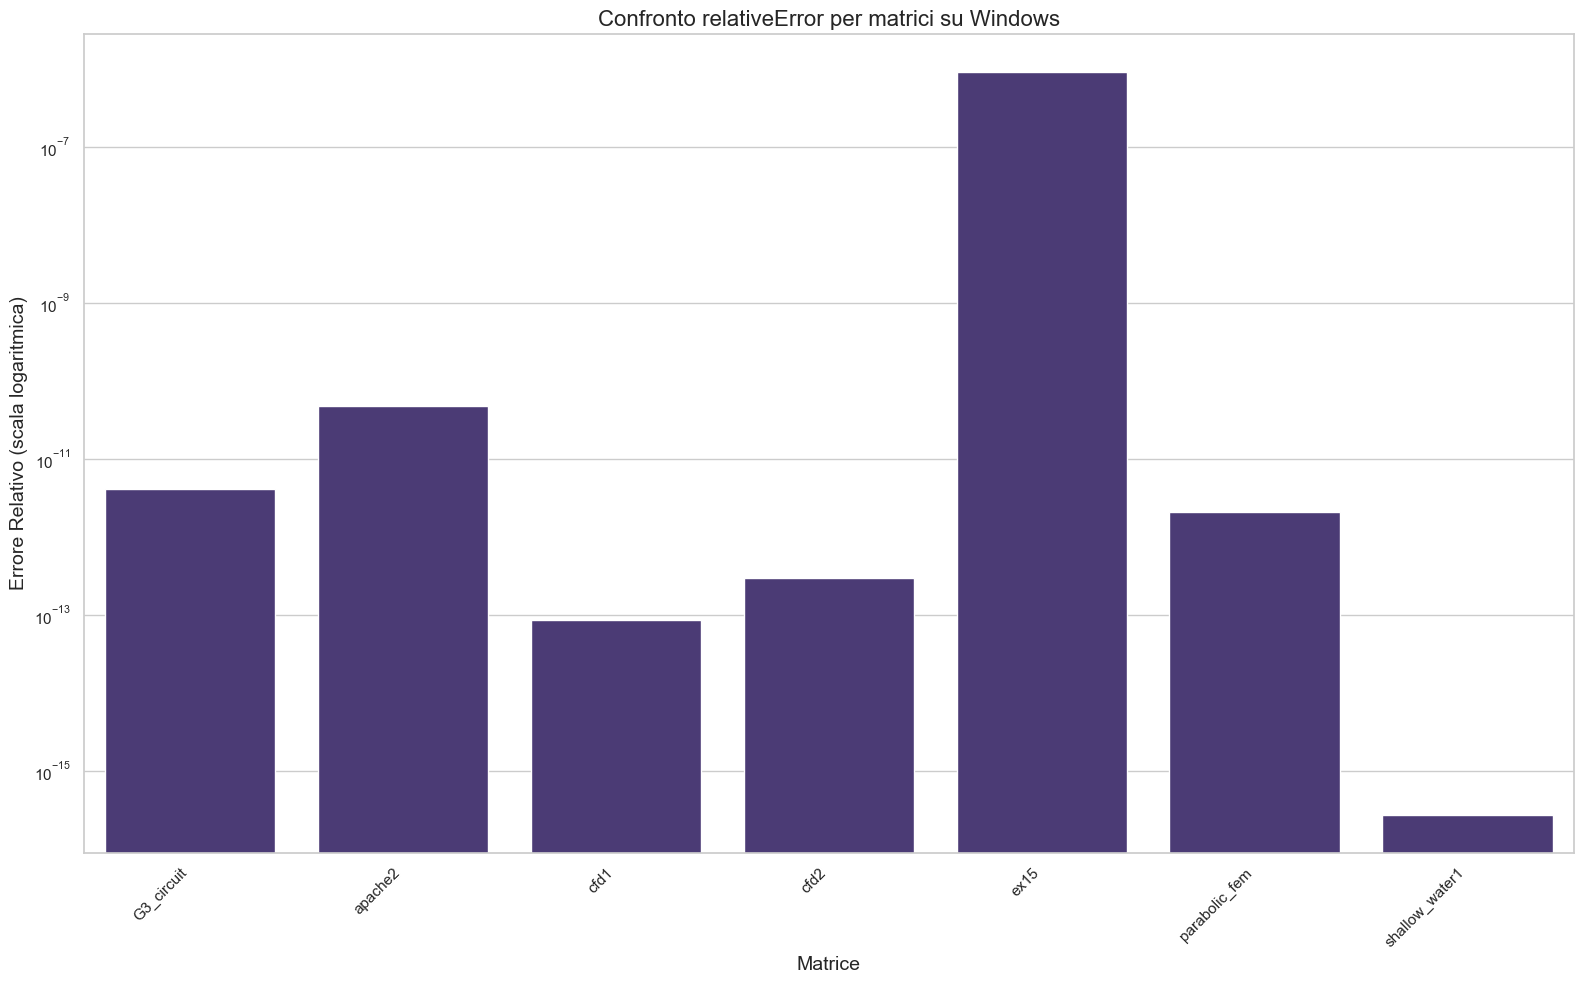

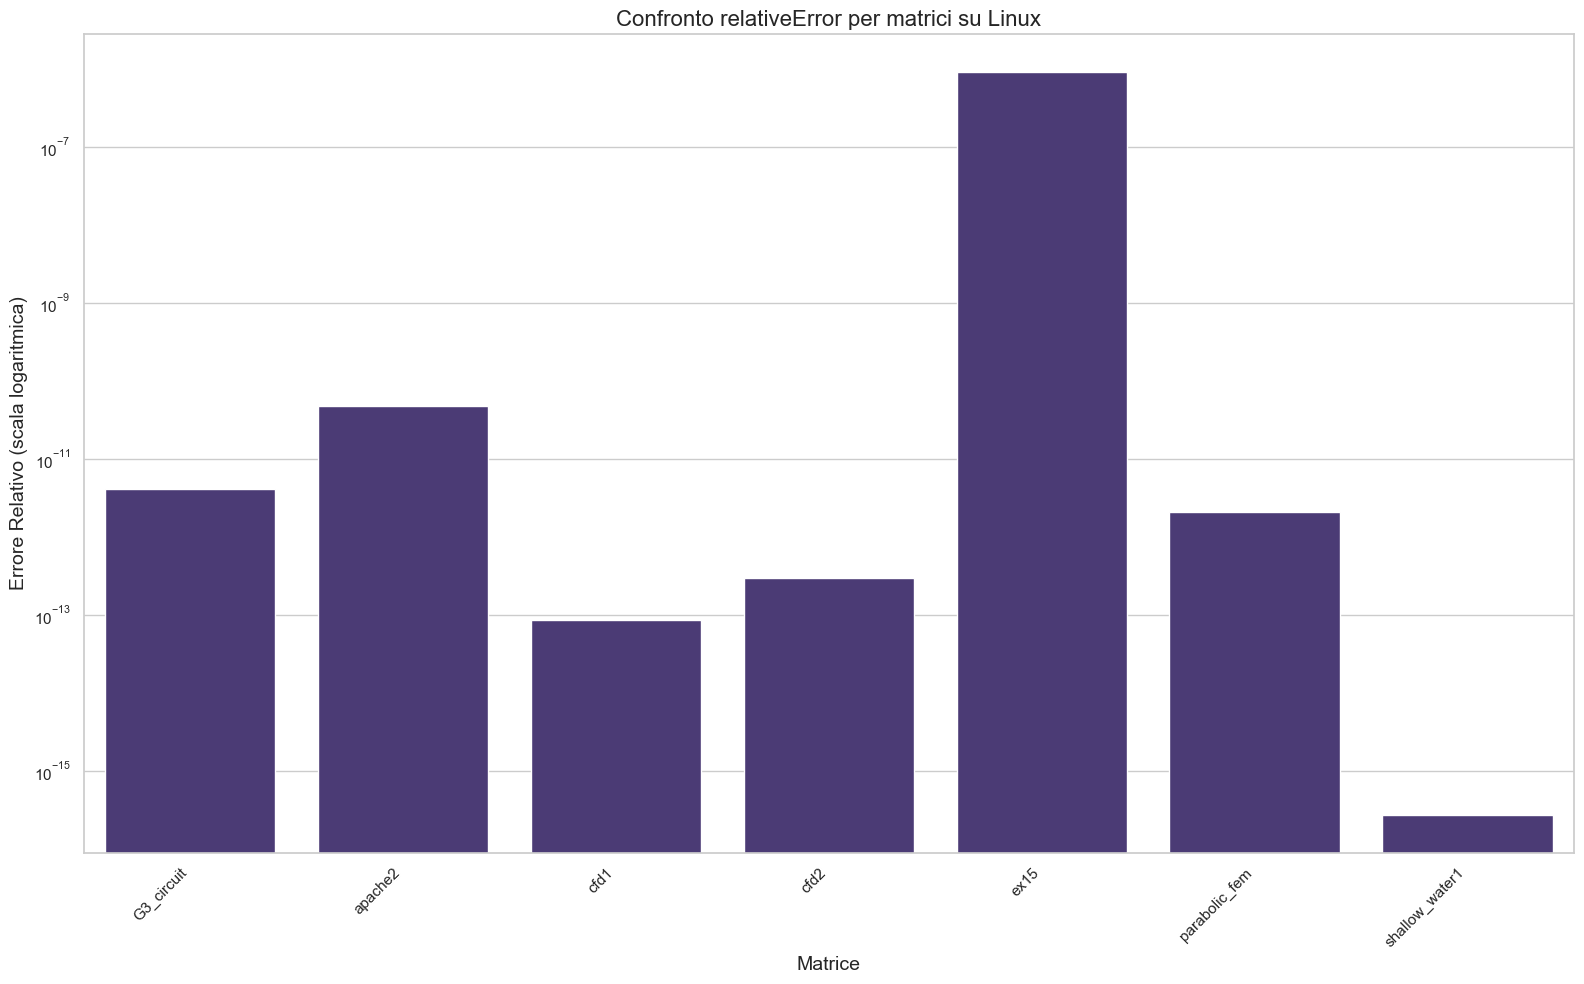

In [83]:
# Funzione modificata per confrontare implementazioni BLAS specifiche per OS
def create_matrix_barplots_matlab(df, os_name, metric_name, figsize=(16, 10)):
    """
    Crea grafici a barre con le matrici sull'asse X
    
    Args:
        df: DataFrame con i dati
        metric_name: nome della metrica da visualizzare (es. 'loadMem')
        figsize: dimensioni del grafico
    """
    # Verifichiamo che esista la colonna MatrixName
    if 'matrixName' not in df.columns:
        print(f"Errore: colonna 'matrixName' non trovata. Colonne disponibili: {df.columns.tolist()}")
        return
    
    # Creiamo una copia del dataframe
    data = df.copy()
    
    # Otteniamo l'elenco unico di matrici e sistemi operativi
    matrices = data['matrixName'].unique()
    
    # Creiamo il grafico
    plt.figure(figsize=figsize)
    ax = sns.barplot(x='matrixName', y=metric_name, data=df)
    
    plt.yscale('log')

    # Formattiamo il grafico
    plt.title(f'Confronto {metric_name} per matrici su {os_name}', fontsize=16)
    plt.xlabel('Matrice', fontsize=14)
    
    # Etichetta Y appropriata in base alla metrica
    if 'Time' in metric_name:
        plt.ylabel('Tempo (ms) (scala logaritmica)', fontsize=14)
    elif 'Mem' in metric_name:
        plt.ylabel('Memoria (Bytes) (scala logaritmica)', fontsize=14)
    elif 'error' in metric_name:
        plt.ylabel('Errore Relativo (scala logaritmica)', fontsize=14)
    elif 'relativeError' in metric_name:
        plt.ylabel('Errore Relativo (scala logaritmica)', fontsize=14)
    else:
        plt.ylabel(metric_name + ' (scala logaritmica)', fontsize=14)
            
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Salviamo e mostriamo il grafico
    plt.savefig(f'report/images/MATLAB/{os_name}/{metric_name}_comparison.png')
    plt.show()

excluded_matrices = ['Flan_1565', 'StocF-1465']

matlab_win_df_filtered = matlab_win_df[~matlab_win_df['matrixName'].isin(excluded_matrices)].copy()
print(f"Righe rimosse dal dataframe MATLAB Windows: {len(matlab_win_df) - len(matlab_win_df_filtered)}")

matlab_linux_df_filtered = matlab_linux_df[~matlab_linux_df['matrixName'].isin(excluded_matrices)].copy()
print(f"Righe rimosse dal dataframe MATLAB Linux: {len(matlab_linux_df) - len(matlab_linux_df_filtered)}")


# Esempio di utilizzo della funzione modificata
# Metriche da visualizzare
metrics = ['decompTime', 'solveTime', 'relativeError']

# Esecuzione della funzione per ogni metrica
for metric in metrics:
    print(f"\nCreazione grafici di confronto per {metric}...")
    create_matrix_barplots_matlab(matlab_win_df_filtered, 'Windows', metric)
    create_matrix_barplots_matlab(matlab_linux_df_filtered, 'Linux', metric)


Creazione line plot per decompTime...


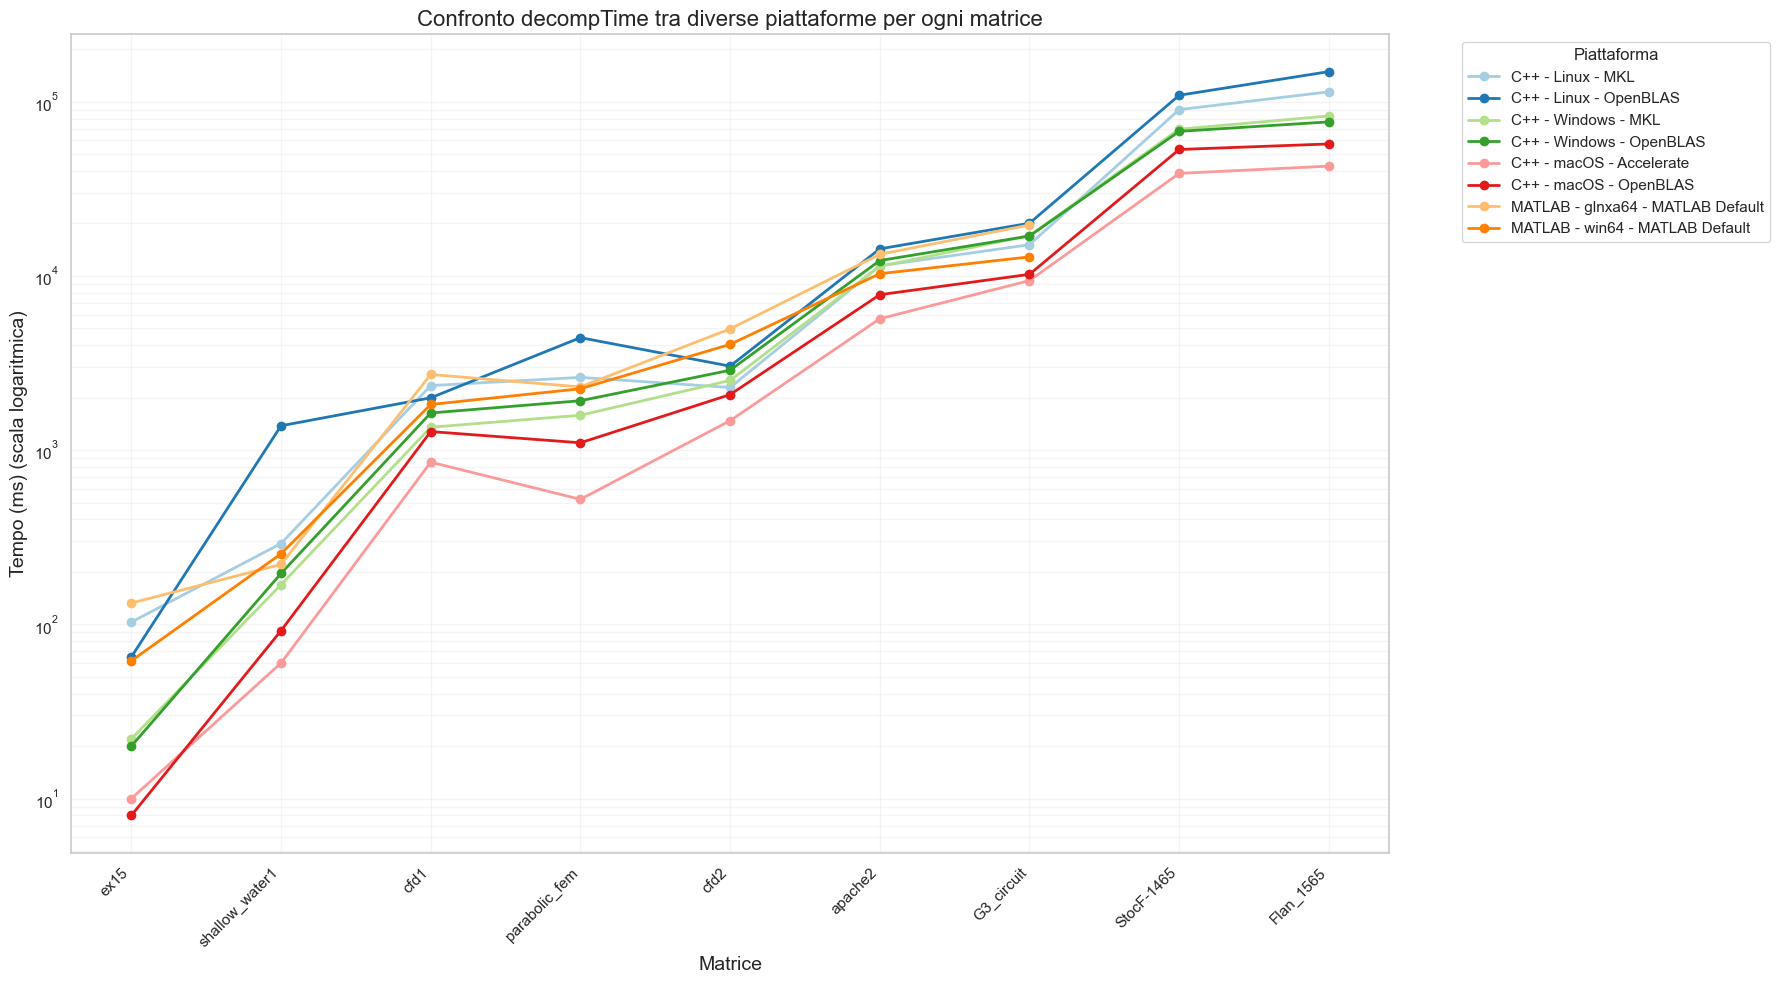


Creazione line plot per solveTime...


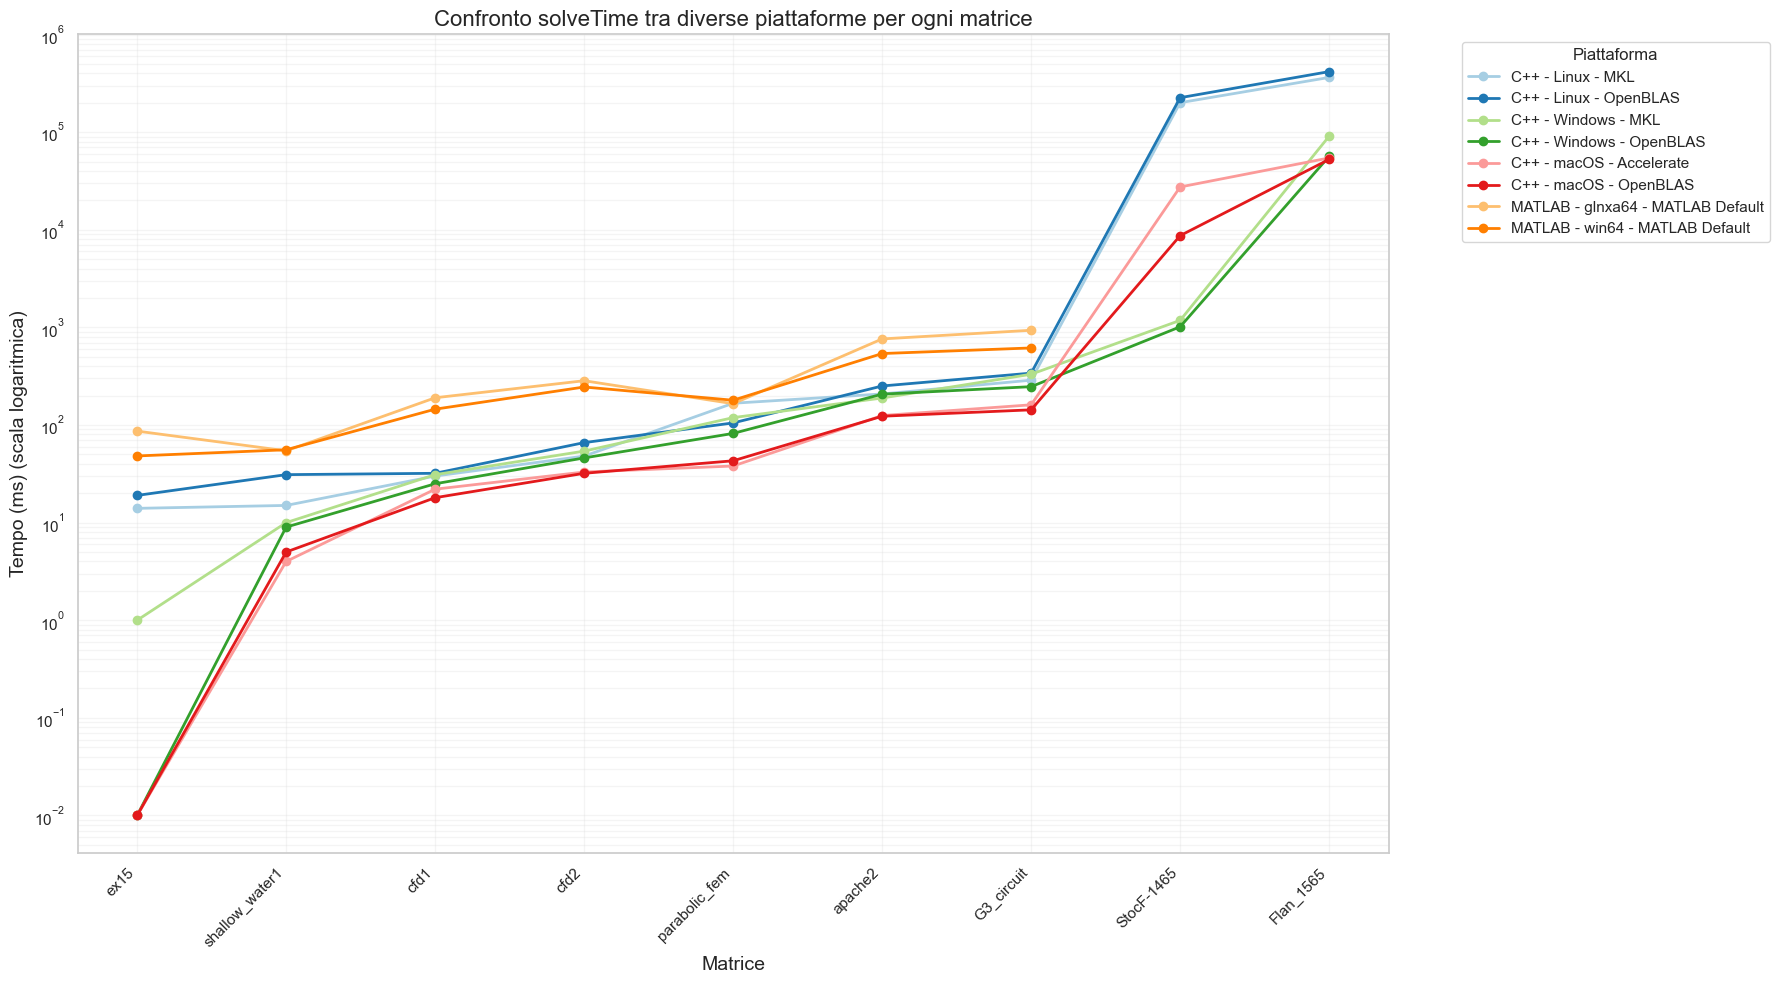


Creazione line plot per loadTime...


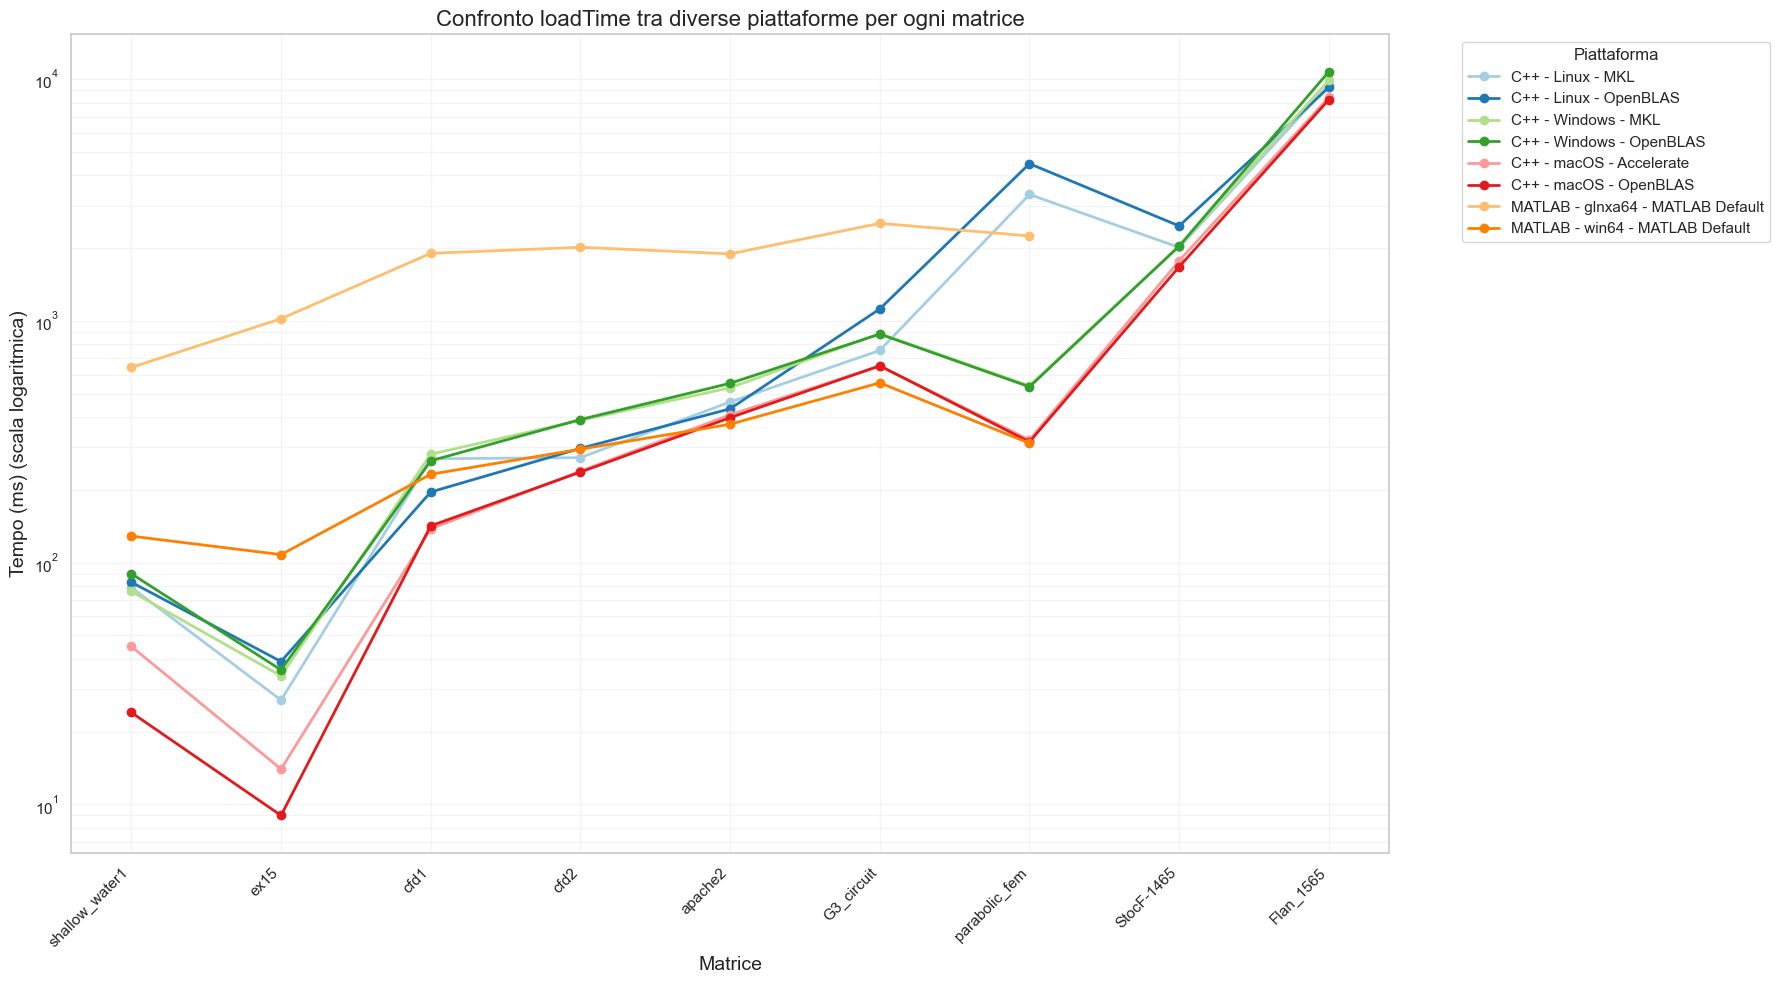


Creazione line plot per l'errore relativo...


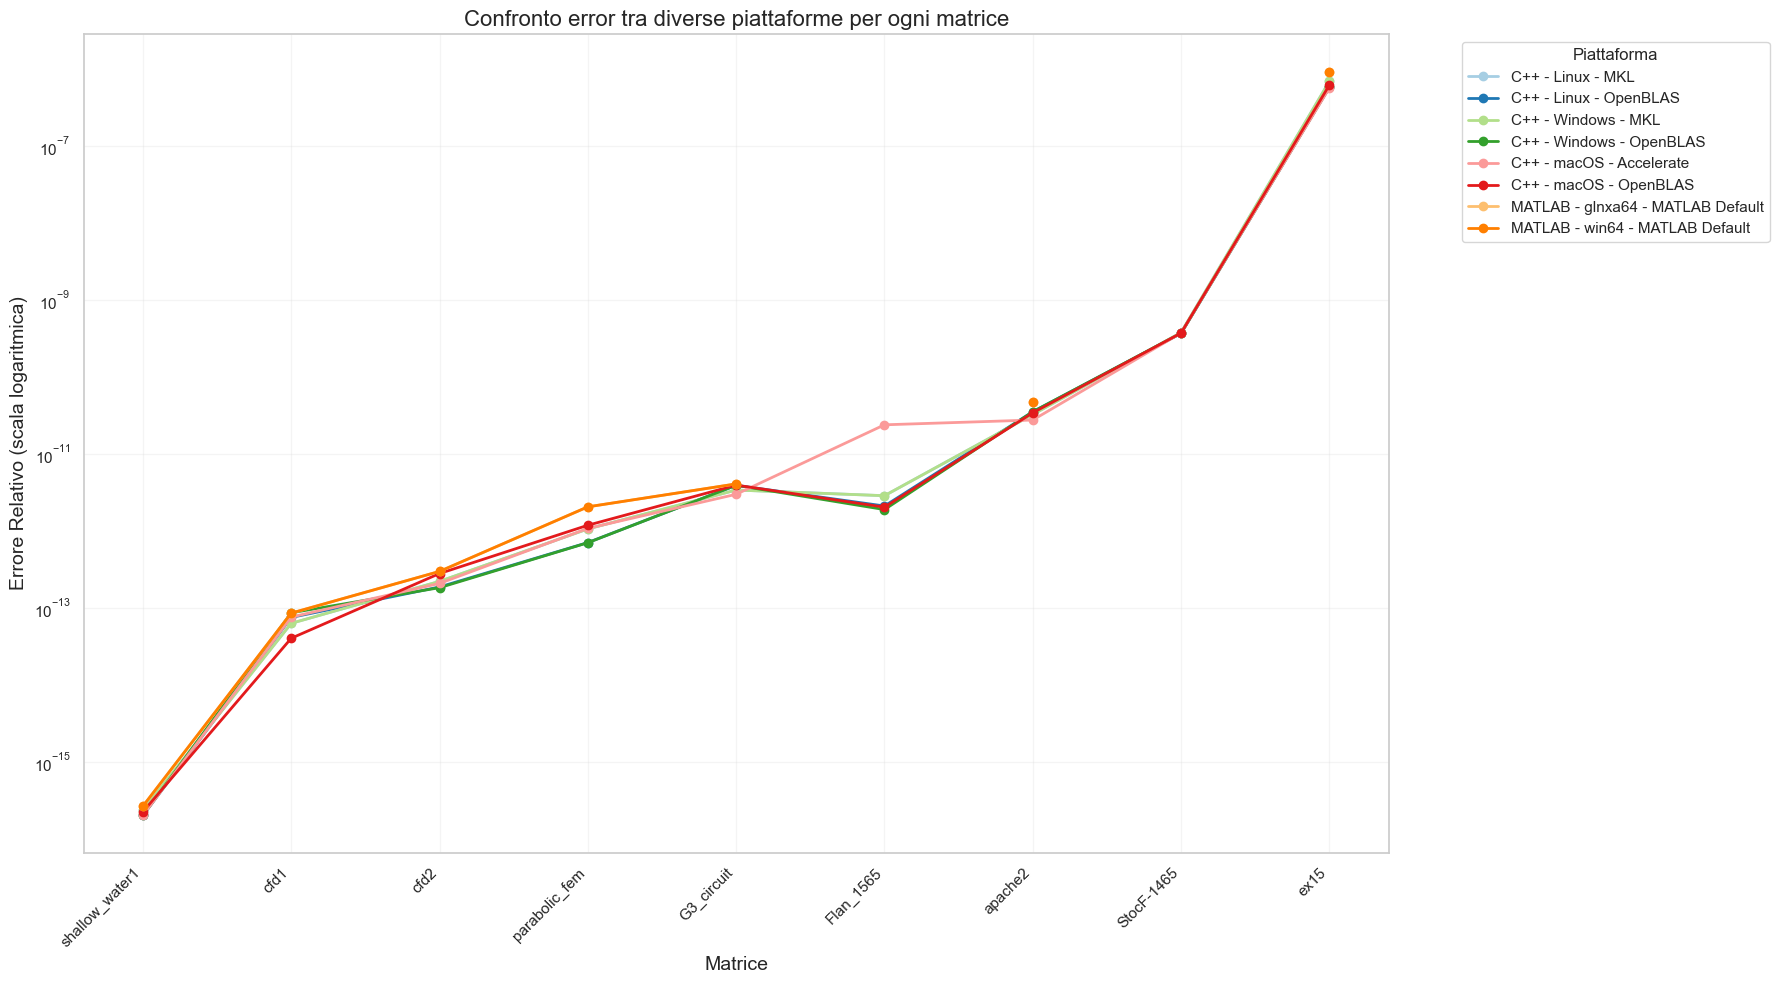

In [110]:
def create_comprehensive_lineplot(cpp_df, matlab_win_df, matlab_linux_df, metric_name, figsize=(18, 10)):
    """
    Crea un line plot che confronta tutte le matrici rispetto a OS, BLAS e linguaggio
    
    Args:
        cpp_df: DataFrame con i dati di C++
        matlab_win_df: DataFrame con i dati di MATLAB Windows
        matlab_linux_df: DataFrame con i dati di MATLAB Linux
        metric_name: nome della metrica da visualizzare (es. 'decompTime')
        figsize: dimensioni del grafico
    """
    # Filtraggio delle matrici problematiche
    excluded_matrices = []
    cpp_filtered = cpp_df[~cpp_df['matrixName'].isin(excluded_matrices)].copy()
    
    # Aggiungiamo una colonna che identifica il linguaggio/programma
    cpp_filtered['language'] = 'C++'
    matlab_win_df['language'] = 'MATLAB'
    matlab_linux_df['language'] = 'MATLAB'
    
    # Per MATLAB, assicuriamoci che le colonne necessarie esistano
    if 'blas' not in matlab_win_df.columns:
        matlab_win_df['blas'] = 'MATLAB Default' 
    if 'blas' not in matlab_linux_df.columns:
        matlab_linux_df['blas'] = 'MATLAB Default'
    
    # Aggiungiamo anche la colonna 'os' se non esiste
    if 'os' not in matlab_win_df.columns:
        matlab_win_df['os'] = 'Windows'
    if 'os' not in matlab_linux_df.columns:
        matlab_linux_df['os'] = 'Linux'
    
    # Gestiamo le differenze nei nomi delle metriche tra C++ e MATLAB
    matlab_metric = metric_name
    if metric_name == 'error':
        matlab_metric = 'relativeError'
    
    # Prepariamo un DataFrame combinato
    cpp_subset = cpp_filtered[['matrixName', 'os', 'blas', metric_name, 'language']].copy()
    
    matlab_win_subset = matlab_win_df[['matrixName', 'os', 'blas', matlab_metric, 'language']].copy()
    matlab_win_subset.rename(columns={matlab_metric: metric_name}, inplace=True)
    
    matlab_linux_subset = matlab_linux_df[['matrixName', 'os', 'blas', matlab_metric, 'language']].copy()
    matlab_linux_subset.rename(columns={matlab_metric: metric_name}, inplace=True)
    
    # Combiniamo i dataframe
    combined_df = pd.concat([cpp_subset, matlab_win_subset, matlab_linux_subset])
    
    combined_df[metric_name] = combined_df[metric_name].replace(0, 0.01)

    # Creiamo una colonna per l'etichetta della linea
    combined_df['platform'] = combined_df['language'] + ' - ' + combined_df['os'] + ' - ' + combined_df['blas']
    
    # Calcoliamo i valori medi per ogni matrice e piattaforma
    pivot_df = combined_df.pivot_table(
        index='matrixName',
        columns='platform',
        values=metric_name,
        aggfunc='mean'
    )
    
    # Ordiniamo le matrici in base al valore medio crescente
    mean_values = pivot_df.mean(axis=1)
    pivot_df = pivot_df.loc[mean_values.sort_values().index]
    
    # Resettiamo l'indice per ottenere matrixName come colonna
    plot_df = pivot_df.reset_index()
    
    # Creiamo il grafico a linee
    plt.figure(figsize=figsize)
    
    # Impostiamo un indice numerico per l'asse x (posizioni delle matrici)
    x = np.arange(len(plot_df))
    
    # Per ogni piattaforma, disegniamo una linea
    for platform in pivot_df.columns:
        plt.plot(x, plot_df[platform], marker='o', linewidth=2, label=platform)
    
    # Impostiamo scala logaritmica per l'asse y
    plt.yscale('log')

    # Impostiamo le etichette sull'asse x con i nomi delle matrici
    plt.xticks(x, plot_df['matrixName'], rotation=45, ha='right')


    # Formattiamo il grafico
    if 'Time' in metric_name:
        plt.ylabel(f'Tempo (ms) (scala logaritmica)', fontsize=14)
    elif 'Mem' in metric_name:
        plt.ylabel(f'Memoria (Bytes) (scala logaritmica)', fontsize=14)
    elif 'error' in metric_name or 'Error' in metric_name:
        plt.ylabel(f'Errore Relativo (scala logaritmica)', fontsize=14)
    else:
        plt.ylabel(f'{metric_name} (scala logaritmica)', fontsize=14)
    
    plt.xlabel('Matrice', fontsize=14)
    plt.title(f'Confronto {metric_name} tra diverse piattaforme per ogni matrice', fontsize=16)
    
    # Aggiungiamo una griglia per migliorare la leggibilità
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    # Mostriamo la legenda in una posizione ottimale
    plt.legend(title='Piattaforma', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig(f'report/images/comparison/{metric_name}_lineplot.png', bbox_inches='tight')
    plt.show()

# Utilizzo della nuova funzione
metrics_to_compare = ['decompTime', 'solveTime', 'loadTime']

# Eseguiamo la funzione per ogni metrica
for metric in metrics_to_compare:
    print(f"\nCreazione line plot per {metric}...")
    create_comprehensive_lineplot(bench_df, matlab_win_df_filtered, matlab_linux_df_filtered, metric)

# Confronto separato per l'errore
print("\nCreazione line plot per l'errore relativo...")
create_comprehensive_lineplot(bench_df, matlab_win_df_filtered, matlab_linux_df_filtered, 'error')